In [150]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

In [151]:
df_1=pd.read_csv('download-33.csv')

In [152]:
df_1.head()

,YearMonth,Rose
0,1980-01,112.00
1,1980-02,118.00
2,1980-03,129.00
3,1980-04,99.00
4,1980-05,116.00


In [153]:
df_1.tail()

,YearMonth,Rose
182,1995-03,45.00
183,1995-04,52.00
184,1995-05,28.00
185,1995-06,40.00
186,1995-07,62.00


In [154]:
from datetime import datetime
df_1["YearMonth"] = pd.to_datetime(df_1["YearMonth"], infer_datetime_format=True)

In [155]:
df_1 = df_1.set_index(["YearMonth"])

In [156]:
df_1.head()

,Rose
YearMonth,
1980-01-01,112.00
1980-02-01,118.00
1980-03-01,129.00
1980-04-01,99.00
1980-05-01,116.00


In [157]:
df_1.tail()

,Rose
YearMonth,
1995-03-01,45.00
1995-04-01,52.00
1995-05-01,28.00
1995-06-01,40.00
1995-07-01,62.00


In [158]:
df_1a = pd.read_csv("download-33.csv",parse_dates=True,squeeze=True,index_col=0)

In [159]:
df_1a.head(10)

YearMonth
1980-01-01   112.00
1980-02-01   118.00
1980-03-01   129.00
1980-04-01    99.00
1980-05-01   116.00
1980-06-01   168.00
1980-07-01   118.00
1980-08-01   129.00
1980-09-01   205.00
1980-10-01   147.00
Name: Rose, dtype: float64

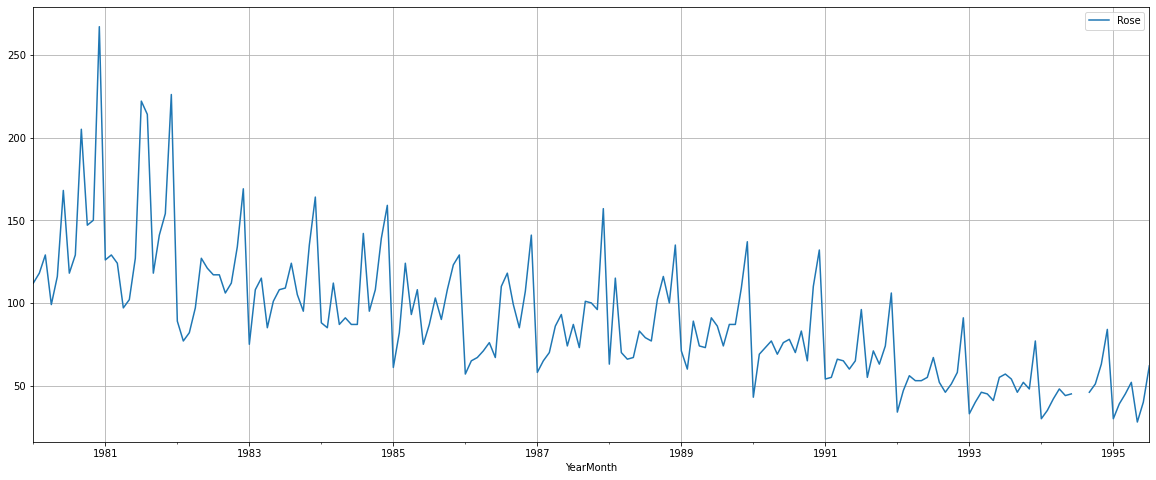

In [160]:
#Plotting Times Series for Sparkling Wine
df_1.plot(figsize=(20,8))
plt.grid();

In [161]:
#Describe Sparkling Wine
round(df_1.describe(),3)

,Rose
count,185.00
mean,90.39
std,39.17
min,28.00
25%,63.00
50%,86.00
75%,112.00
max,267.00


In [162]:
## Checking the rows and columns of Sparkling Wine dataset

df_1.shape

(187, 1)

In [163]:
# Checking for Null Values in Sparkling Wine dataset

df_1.isnull().sum()

Rose    2
dtype: int64

In [164]:
## Checking the data type Sparkling Wine

df_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


### Imputing Null Values

In [165]:
# Rose Wine

df_1['1994']

,Rose
YearMonth,
1994-01-01,30.00
1994-02-01,35.00
1994-03-01,42.00
1994-04-01,48.00
1994-05-01,44.00
1994-06-01,45.00
1994-07-01,NaN
1994-08-01,NaN
1994-09-01,46.00


In [166]:
df_1['1994'].head()

,Rose
YearMonth,
1994-01-01,30.00
1994-02-01,35.00
1994-03-01,42.00
1994-04-01,48.00
1994-05-01,44.00


In [167]:
# Replacing 01-12-1994 value with Nan Value
df_missing_value = df_1.replace(to_replace=35.0,value=np.NaN)

Let us check whether the value has been replaced with a NaN value.

In [168]:
df_missing_value.isna().sum()

Rose    3
dtype: int64

We see that there is one missing value present.
Now, let us impute that with the methods at our disposal. The following are just a few methods to impute the missing values in the Time Series.

In [169]:
df_missing_value.interpolate()['1994'].head()

,Rose
YearMonth,
1994-01-01,30.00
1994-02-01,36.00
1994-03-01,42.00
1994-04-01,48.00
1994-05-01,44.00


We see that the newly imputed value is '36' compared to the old value of '35'.

In [170]:
df_missing_value.interpolate(method='spline',order=1)['1994'].head()

,Rose
YearMonth,
1994-01-01,30.00
1994-02-01,36.37
1994-03-01,42.00
1994-04-01,48.00
1994-05-01,44.00


We see that the newly imputed value is '36.36' compared to the old value of '35'.

In [171]:
df_missing_value.interpolate(method='pad')['1994'].head()

,Rose
YearMonth,
1994-01-01,30.00
1994-02-01,30.00
1994-03-01,42.00
1994-04-01,48.00
1994-05-01,44.00


We see that the newly imputed value is '30.0' compared to the old value of '35'.

In [172]:
df_missing_value.interpolate(method='spline',order=2)['1994'].head()

,Rose
YearMonth,
1994-01-01,30.00
1994-02-01,25.68
1994-03-01,42.00
1994-04-01,48.00
1994-05-01,44.00


We see that the newly imputed value is '25.6' compared to the old value of '35'.

In [173]:
df_missing_value.interpolate(method='spline',order=3)['1994'].head()

,Rose
YearMonth,
1994-01-01,30.00
1994-02-01,23.17
1994-03-01,42.00
1994-04-01,48.00
1994-05-01,44.00


We see that the newly imputed value is '23.17' compared to the old value of '35'.

So we see that using interpolate function gives us the value as 36 which is closest to 35, the original value we replaced with Nan. So this is the best way to treat the null values in the Rose dataset.

In [174]:
df_1['1994']=df_1['1994'].interpolate()

In [175]:
df_1.isnull().sum()

Rose    0
dtype: int64

There are no left out Null Values in out time series

### Plot year on year Wine Sales boxplots

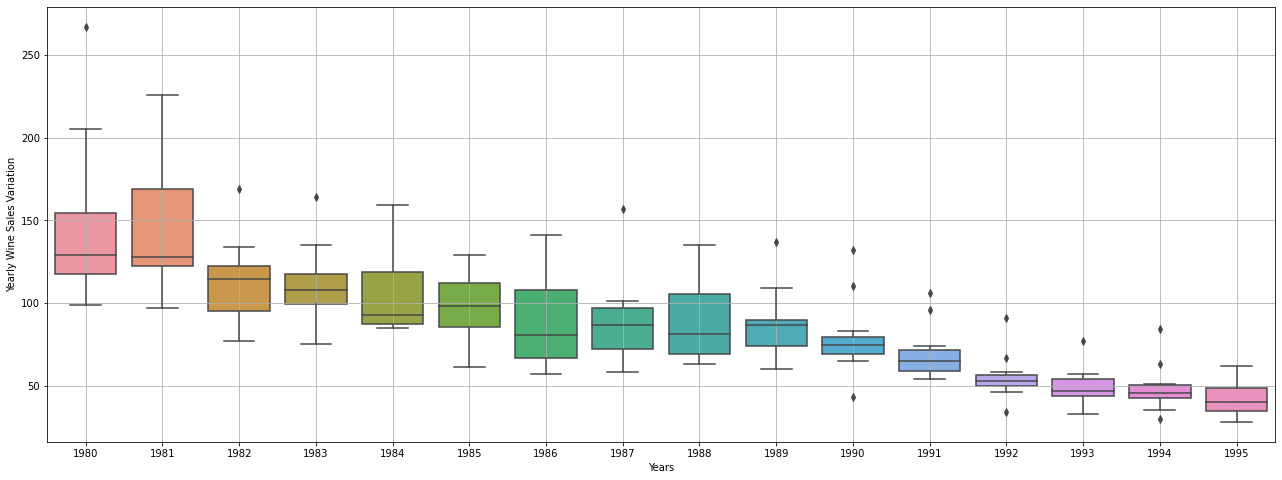

In [176]:
# Rose Wine
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_1a.index.year, df_1a,whis=1.5) # ax=ax helps in creating multiple subplots.You can also remove, it works
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Wine Sales Variation');

## Plot a monthly boxplot for the wine sales taking all the years into account.

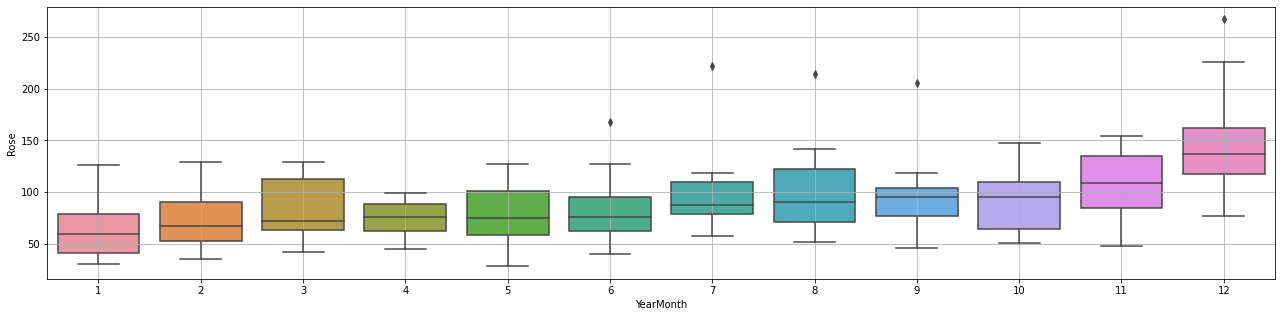

In [177]:
# Series 1
fig, ax = plt.subplots(figsize=(22,5))
sns.boxplot(df_1a.index.month, df_1a, ax=ax,whis=1.5)
plt.grid();

### Plot a monthplot of the give Time Series.

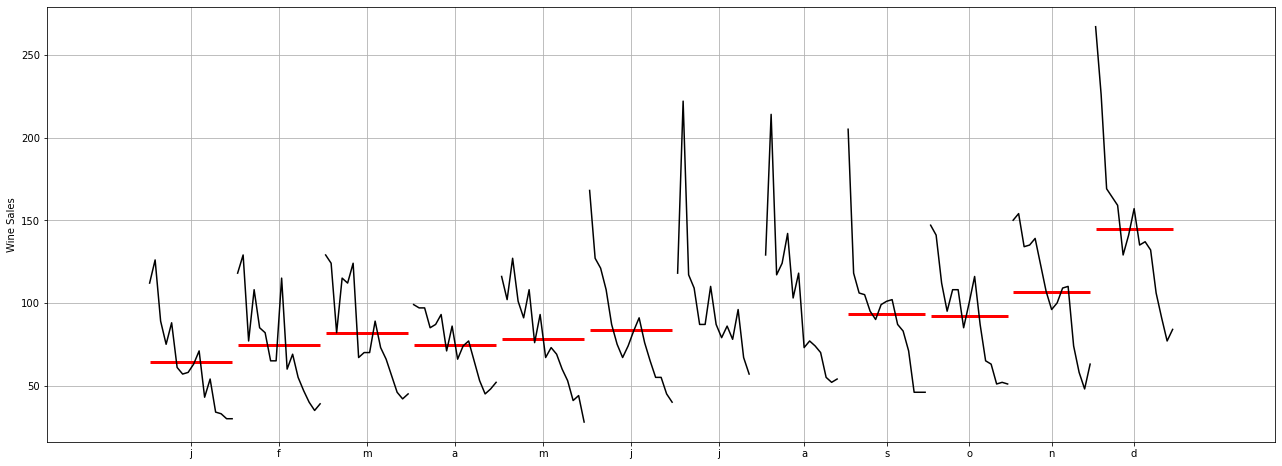

In [178]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df_1a,ylabel='Wine Sales',ax=ax)
plt.grid();

### Plotting time series of different months of different years sales data

In [179]:
yearly_sales_across_months = pd.pivot_table(df_1, values = 'Rose', columns = df_1.index.month, 
                                        index = df_1.index.year)

yearly_sales_across_months

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,112.00,118.00,129.00,99.00,116.00,168.00,118.00,129.00,205.00,147.00,150.00,267.00
1981,126.00,129.00,124.00,97.00,102.00,127.00,222.00,214.00,118.00,141.00,154.00,226.00
1982,89.00,77.00,82.00,97.00,127.00,121.00,117.00,117.00,106.00,112.00,134.00,169.00
1983,75.00,108.00,115.00,85.00,101.00,108.00,109.00,124.00,105.00,95.00,135.00,164.00
1984,88.00,85.00,112.00,87.00,91.00,87.00,87.00,142.00,95.00,108.00,139.00,159.00
1985,61.00,82.00,124.00,93.00,108.00,75.00,87.00,103.00,90.00,108.00,123.00,129.00
1986,57.00,65.00,67.00,71.00,76.00,67.00,110.00,118.00,99.00,85.00,107.00,141.00
1987,58.00,65.00,70.00,86.00,93.00,74.00,87.00,73.00,101.00,100.00,96.00,157.00
1988,63.00,115.00,70.00,66.00,67.00,83.00,79.00,77.00,102.00,116.00,100.00,135.00


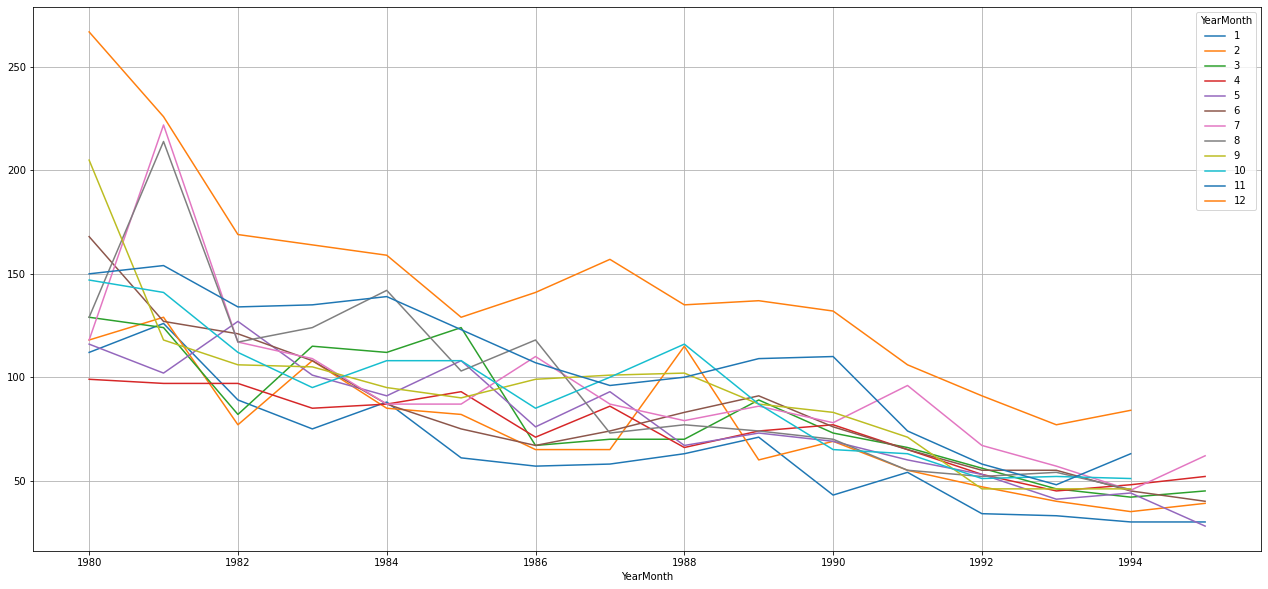

In [180]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

## Read this monthly data into a quarterly and yearly format. Compare the Time Series plot and draw inferences.



### Yearly Plot


Let us try to resample or aggregate the Time Series from an annual perspective and sum up the observations of each month.

In [181]:
df_yearly_sum = df_1.resample('A').sum()
df_yearly_sum.head()

,Rose
YearMonth,
1980-12-31,1758.00
1981-12-31,1780.00
1982-12-31,1348.00
1983-12-31,1324.00
1984-12-31,1280.00


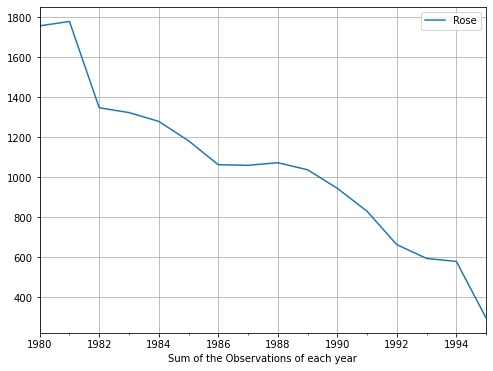

In [182]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

Let us try to resample or aggregate the Time Series from an annual perspective and take the mean of the observations of the year considering each month as an observation.

In [183]:
df_yearly_mean = df_1.resample('Y').mean()
df_yearly_mean.head()

,Rose
YearMonth,
1980-12-31,146.50
1981-12-31,148.33
1982-12-31,112.33
1983-12-31,110.33
1984-12-31,106.67


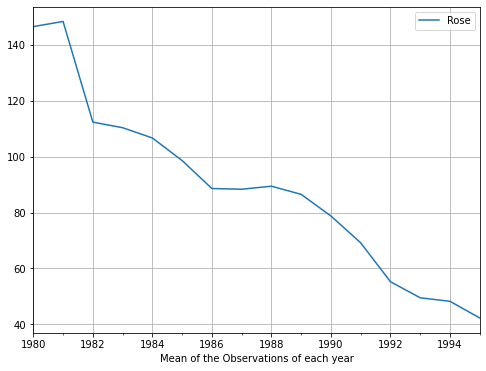

In [184]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

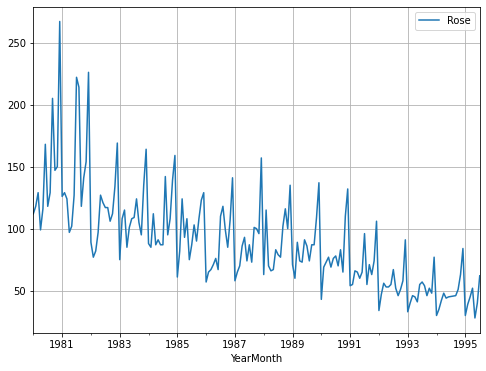

In [185]:
df_1.plot()
plt.grid();

The resampled yearly or annual series have smoothened out the seasonality and have only been able to capture the year on year trend where there was.

### Quarterly Plot

In [186]:
df_quarterly_sum = df_1.resample('Q').sum()
df_quarterly_sum.head()

,Rose
YearMonth,
1980-03-31,359.00
1980-06-30,383.00
1980-09-30,452.00
1980-12-31,564.00
1981-03-31,379.00


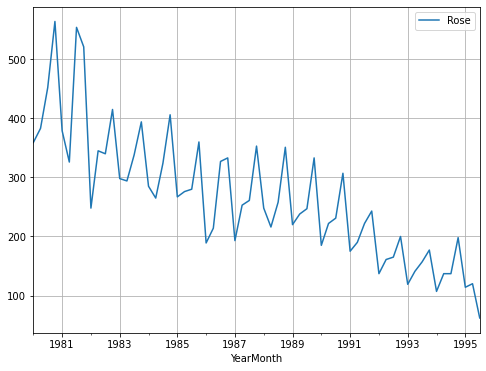

In [187]:
df_quarterly_sum.plot();
plt.grid()

In [188]:
df_quarterly_mean = df_1.resample('Q').mean()
df_quarterly_mean.head()

,Rose
YearMonth,
1980-03-31,119.67
1980-06-30,127.67
1980-09-30,150.67
1980-12-31,188.00
1981-03-31,126.33


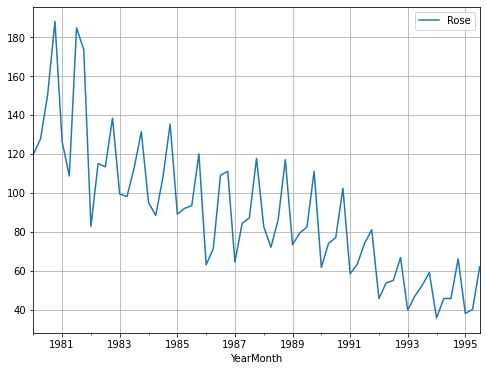

In [189]:
df_quarterly_mean.plot();
plt.grid()

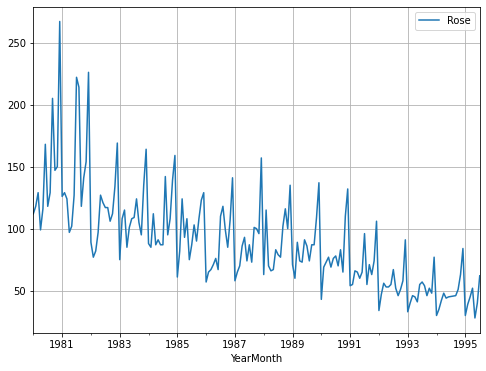

In [190]:
df_1.plot()
plt.grid();

We see that the year on year quarterly series represents the year on year monthly series. The quarterly series is able to catch the seasonality in the data.

### Daily Plot

Now, let us try to understand the data from a daily perspective.

In [191]:
df_daily_sum = df_1.resample('D').sum()
df_daily_sum

,Rose
YearMonth,
1980-01-01,112.00
1980-01-02,0.00
1980-01-03,0.00
1980-01-04,0.00
1980-01-05,0.00
...,...
1995-06-27,0.00
1995-06-28,0.00
1995-06-29,0.00


The values which the original series cannot provide is taken as 0 by python if we try to resample the data on a daily basis.

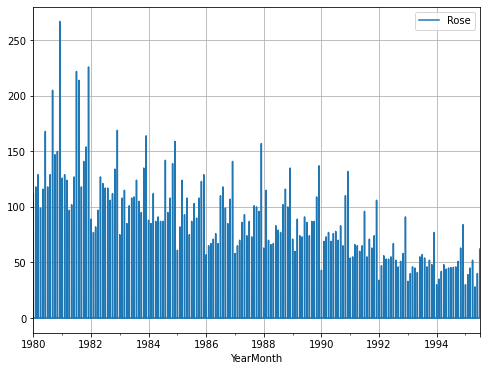

In [192]:
df_daily_sum.plot()
plt.grid();

The above graph fails to give us a proper understanding of our data. Thus, resampling the data to intervals where a number of observations are 0 is not a good idea as that does not give us an understanding of the performance of the time series.

To get a very high-level overview of the trend of the Time Series Data (if Trend is present) can be understood by resampling the data keeping the intervals very large.

### Decade Plot

In [193]:
df_decade_sum = df_1.resample('10Y').sum()
df_decade_sum

,Rose
YearMonth,
1980-12-31,1758.00
1990-12-31,12094.00
2000-12-31,2962.00


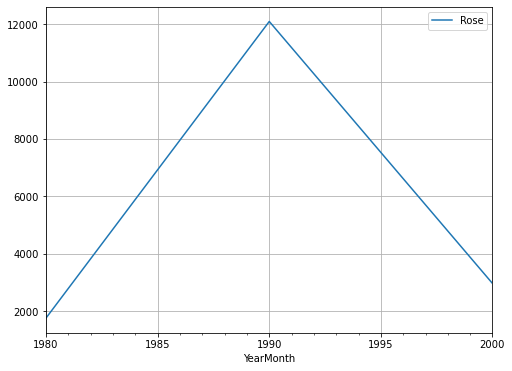

In [194]:
df_decade_sum.plot();
plt.grid()

If we take the resampling period to be 10 years or a decade, we see that the seasonality present has been smoothed over and it is only giving an estimate of the trend.

# Decompose the Time Series

### Additive Model

In [195]:
from statsmodels.tsa.seasonal import seasonal_decompose

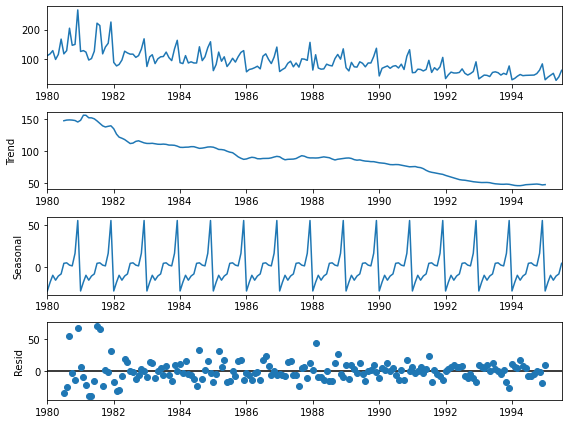

In [196]:
from pylab import rcParams
rcParams['figure.figsize'] =8,6
decomposition = seasonal_decompose(df_1,model='additive')
decomposition.plot();

As per the 'additive' decomposition, we see that there is a pronounced trend in the earlier years of the data. There is a seasonality as well.

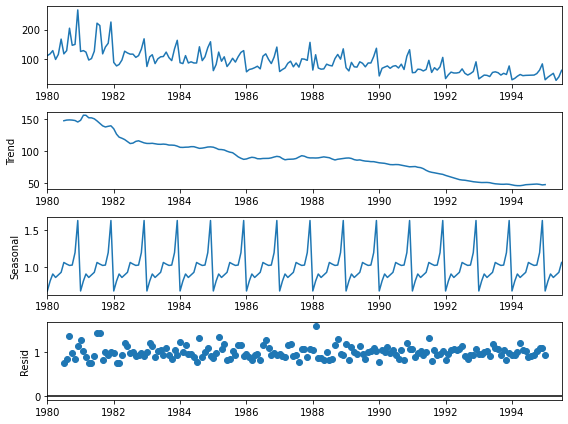

In [197]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] =8,6
decomposition = seasonal_decompose(df_1,model='multiplicative')
decomposition.plot();

In [198]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [199]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01      NaN
1980-02-01      NaN
1980-03-01      NaN
1980-04-01      NaN
1980-05-01      NaN
1980-06-01      NaN
1980-07-01   147.08
1980-08-01   148.12
1980-09-01   148.37
1980-10-01   148.08
1980-11-01   147.42
1980-12-01   145.12
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   0.67
1980-02-01   0.81
1980-03-01   0.90
1980-04-01   0.85
1980-05-01   0.89
1980-06-01   0.92
1980-07-01   1.06
1980-08-01   1.04
1980-09-01   1.02
1980-10-01   1.02
1980-11-01   1.19
1980-12-01   1.63
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01    NaN
1980-02-01    NaN
1980-03-01    NaN
1980-04-01    NaN
1980-05-01    NaN
1980-06-01    NaN
1980-07-01   0.76
1980-08-01   0.84
1980-09-01   1.36
1980-10-01   0.97
1980-11-01   0.85
1980-12-01   1.13
Name: resid, dtype: float64 



In [200]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

YearMonth
1980-01-01      NaN
1980-02-01      NaN
1980-03-01      NaN
1980-04-01      NaN
1980-05-01      NaN
1980-06-01      NaN
1980-07-01   147.84
1980-08-01   148.97
1980-09-01   149.73
1980-10-01   149.05
1980-11-01   148.27
1980-12-01   146.25
dtype: float64

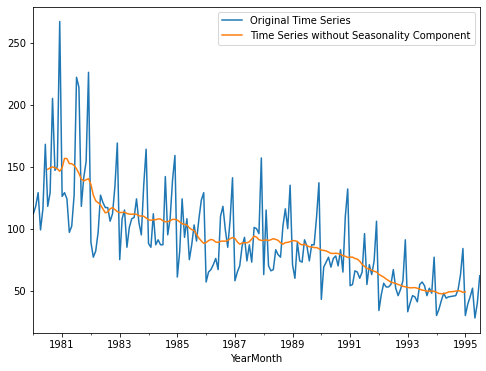

In [201]:
## Ploting without seasonality component
df_1.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

In [202]:
deaseasonalized_ts1 = trend 
deaseasonalized_ts1.head(12)

YearMonth
1980-01-01      NaN
1980-02-01      NaN
1980-03-01      NaN
1980-04-01      NaN
1980-05-01      NaN
1980-06-01      NaN
1980-07-01   147.08
1980-08-01   148.12
1980-09-01   148.37
1980-10-01   148.08
1980-11-01   147.42
1980-12-01   145.12
Name: trend, dtype: float64

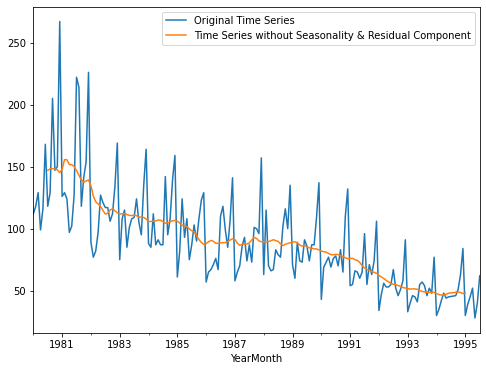

In [203]:
# Ploting without seasonality component and residual
df_1.plot()
deaseasonalized_ts1.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality & Residual Component"]);

## Split the data into train and test and plot the training and test data.¶

In [204]:
train    =   df_1[0:int(len(df_1)*0.71)] 
test     =   df_1[int(len(df_1)*0.71):]

In [205]:
train

,Rose
YearMonth,
1980-01-01,112.00
1980-02-01,118.00
1980-03-01,129.00
1980-04-01,99.00
1980-05-01,116.00
...,...
1990-08-01,70.00
1990-09-01,83.00
1990-10-01,65.00


In [206]:
test

,Rose
YearMonth,
1991-01-01,54.00
1991-02-01,55.00
1991-03-01,66.00
1991-04-01,65.00
1991-05-01,60.00
1991-06-01,65.00
1991-07-01,96.00
1991-08-01,55.00
1991-09-01,71.00


In [207]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [208]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
              Rose
YearMonth        
1980-01-01 112.00
1980-02-01 118.00
1980-03-01 129.00
1980-04-01  99.00
1980-05-01 116.00 

Last few rows of Training Data 
              Rose
YearMonth        
1990-08-01  70.00
1990-09-01  83.00
1990-10-01  65.00
1990-11-01 110.00
1990-12-01 132.00 

First few rows of Test Data 
             Rose
YearMonth       
1991-01-01 54.00
1991-02-01 55.00
1991-03-01 66.00
1991-04-01 65.00
1991-05-01 60.00 

Last few rows of Test Data 
             Rose
YearMonth       
1995-03-01 45.00
1995-04-01 52.00
1995-05-01 28.00
1995-06-01 40.00
1995-07-01 62.00 



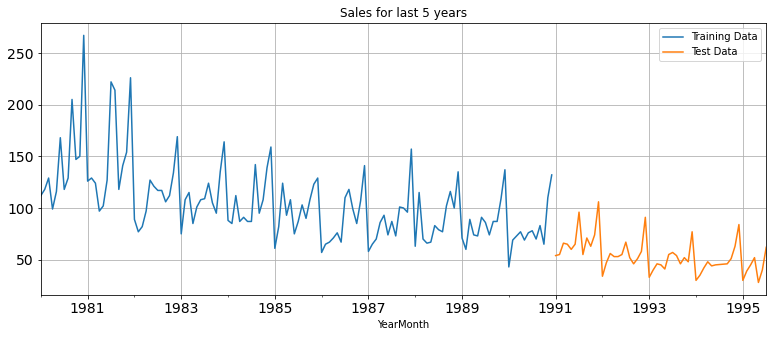

In [209]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title("Sales for last 5 years")
plt.show()

##### Note: It is difficult to predict the future observations if such an instance has not happened in the past. From our train-test split we are predicting likewise behaviour as compared to the past years.

## Model 1: Linear Regression



For this particular linear regression, we are going to regress the 'Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [210]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [211]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [212]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01 112.00     1
1980-02-01 118.00     2
1980-03-01 129.00     3
1980-04-01  99.00     4
1980-05-01 116.00     5 

Last few rows of Training Data 
              Rose  time
YearMonth              
1990-08-01  70.00   128
1990-09-01  83.00   129
1990-10-01  65.00   130
1990-11-01 110.00   131
1990-12-01 132.00   132 

First few rows of Test Data 
             Rose  time
YearMonth             
1991-01-01 54.00   133
1991-02-01 55.00   134
1991-03-01 66.00   135
1991-04-01 65.00   136
1991-05-01 60.00   137 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-01 45.00   183
1995-04-01 52.00   184
1995-05-01 28.00   185
1995-06-01 40.00   186
1995-07-01 62.00   187 



Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [213]:
from sklearn.linear_model import LinearRegression

In [214]:
lr = LinearRegression()

In [215]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

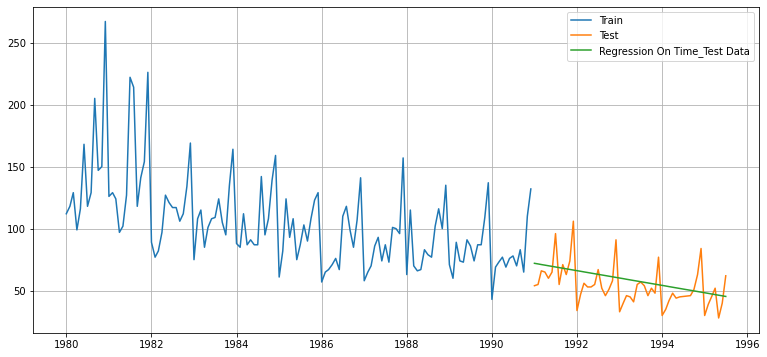

In [216]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

#### Defining the accuracy metrics.

In [217]:
from sklearn import metrics

## Model Evaluation

In [218]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.269


In [219]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,15.27


## Model Naive Approach

For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.¶

In [220]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [221]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01   132.00
1991-02-01   132.00
1991-03-01   132.00
1991-04-01   132.00
1991-05-01   132.00
Name: naive, dtype: float64

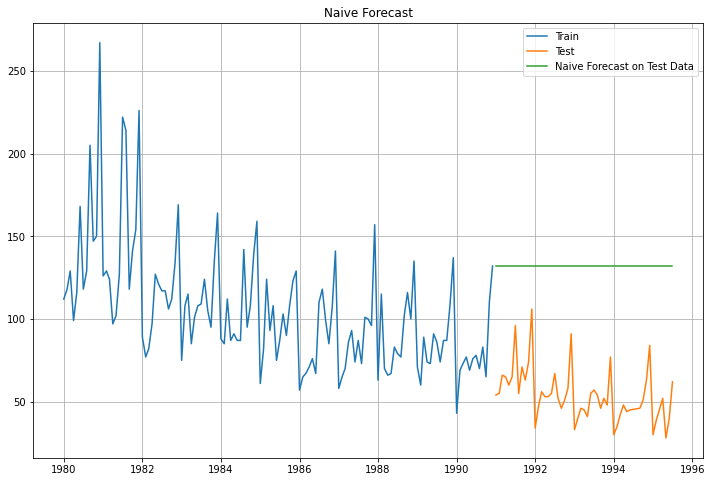

In [222]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

## Model Evaluation

In [223]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.719


In [224]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,15.27
NaiveModel,79.72


## Method 3: Simple Average

For this particular simple average method, we will forecast by using the average of the training values.

In [225]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [226]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
YearMonth,,
1991-01-01,54.00,104.94
1991-02-01,55.00,104.94
1991-03-01,66.00,104.94
1991-04-01,65.00,104.94
1991-05-01,60.00,104.94


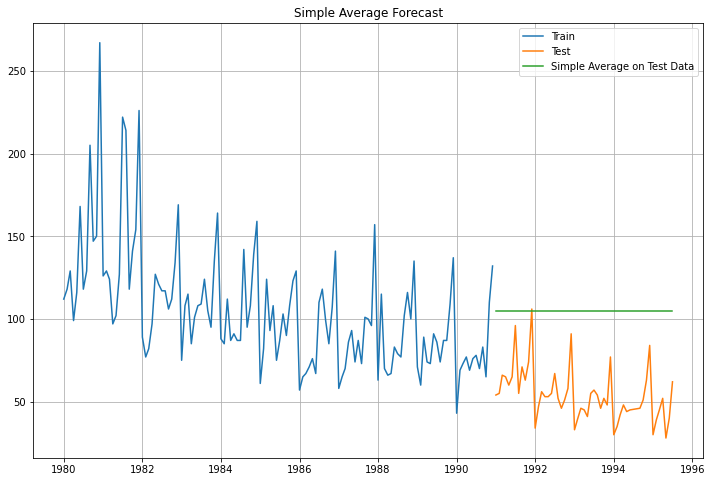

In [227]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

## Model Evaluation


In [228]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.461


In [229]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,15.27
NaiveModel,79.72
SimpleAverageModel,53.46


## Method 4: Moving Average(MA)

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.
For Moving Average, we are going to average over the entire data.

In [230]:
MovingAverage = df_1.copy()
MovingAverage.head()

,Rose
YearMonth,
1980-01-01,112.00
1980-02-01,118.00
1980-03-01,129.00
1980-04-01,99.00
1980-05-01,116.00


Trailing moving averages

In [231]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_3'] = MovingAverage['Rose'].rolling(3).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_3,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,,
1980-01-01,112.00,NaN,NaN,NaN,NaN,NaN
1980-02-01,118.00,115.00,NaN,NaN,NaN,NaN
1980-03-01,129.00,123.50,119.67,NaN,NaN,NaN
1980-04-01,99.00,114.00,115.33,114.50,NaN,NaN
1980-05-01,116.00,107.50,114.67,115.50,NaN,NaN


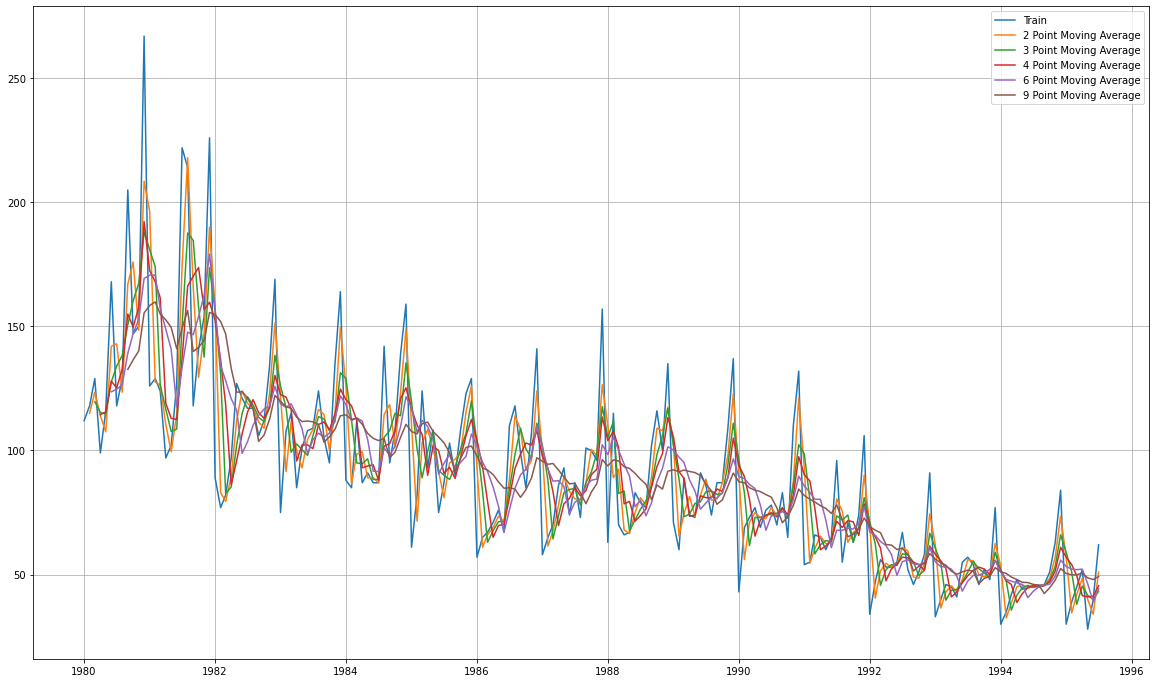

In [232]:
## Plotting on the whole data

plt.figure(figsize=(20,12))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_3'], label='3 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [233]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.71)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.71):]

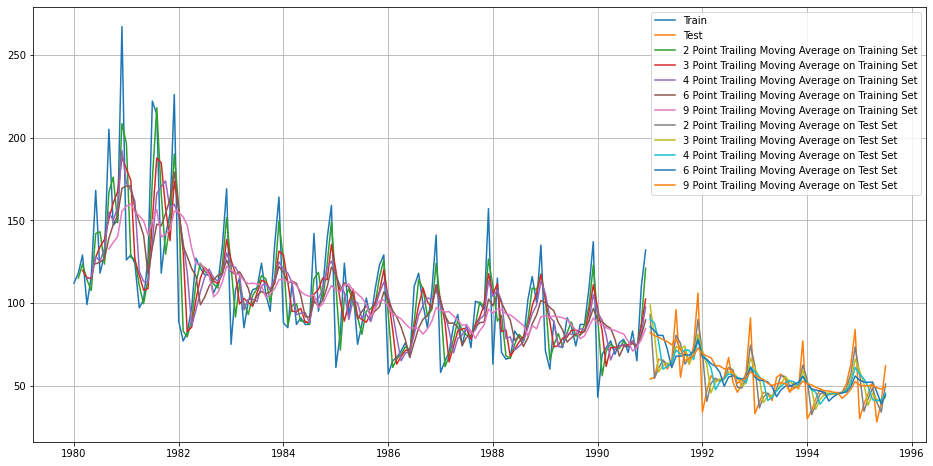

In [234]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_3'], label='3 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_3'], label='3 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

### Model Evaluation

##### Done only on the test data.

In [235]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 3 point Trailing MA

rmse_model4_test_3 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_3'],squared=False)
print("For 3 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_3))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529
For 3 point Moving Average Model forecast on the Training Data,  RMSE is 14.127
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.728 


In [236]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_3,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','3pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,15.27
NaiveModel,79.72
SimpleAverageModel,53.46
2pointTrailingMovingAverage,11.53
3pointTrailingMovingAverage,14.13
4pointTrailingMovingAverage,14.45
6pointTrailingMovingAverage,14.57
9pointTrailingMovingAverage,14.73


Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

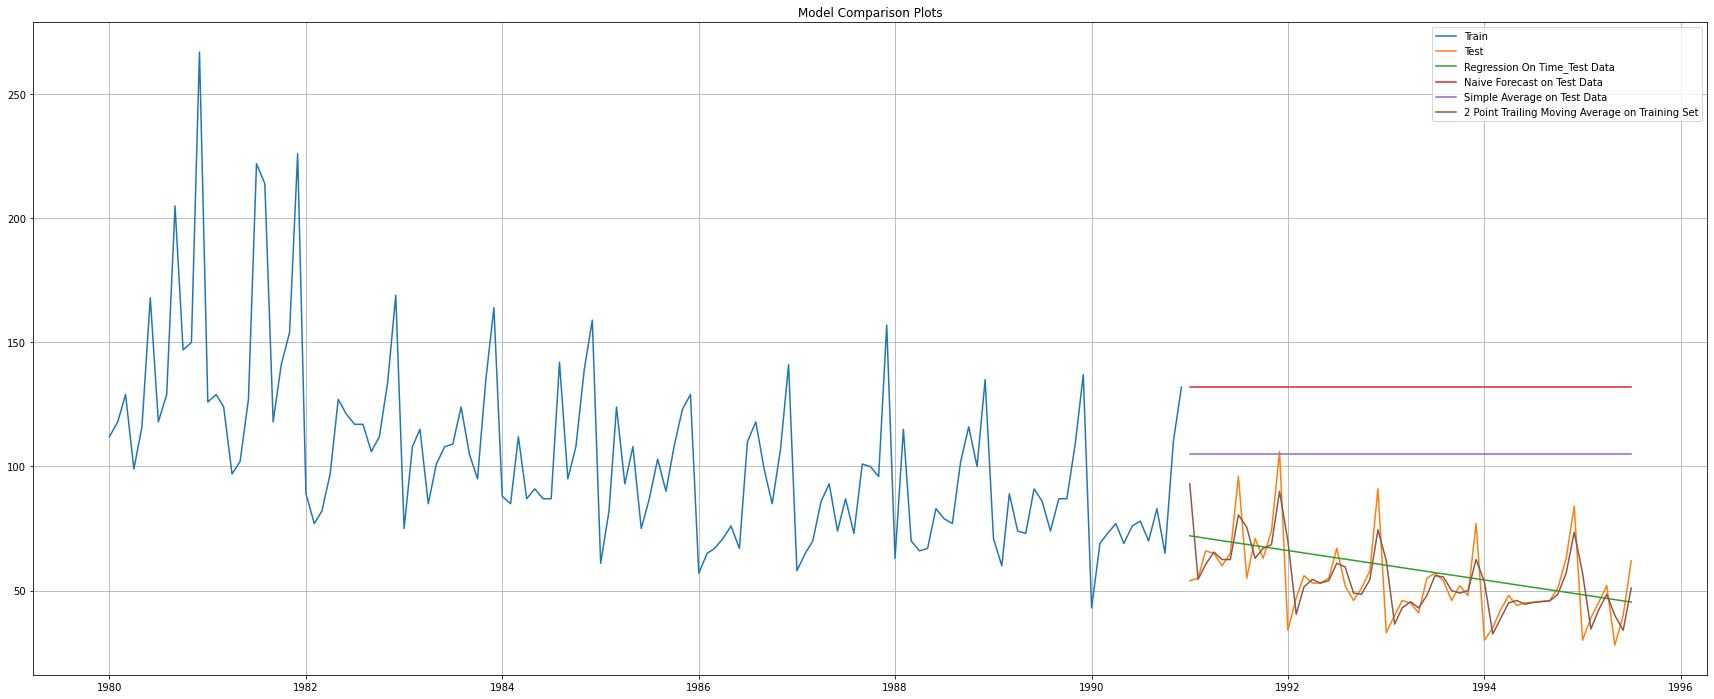

In [237]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Method 5: Simple Exponential Smoothing

In [238]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [239]:
SES_train = train.copy()
SES_test = test.copy()

In [240]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

In [241]:
model_SES_autofit = model_SES.fit(optimized=True)

In [242]:
model_SES_autofit.params

{'smoothing_level': 0.09874989207824814,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.3869755697016,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [243]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
pd.options.display.float_format = '{:.2f}'.format
SES_test.head()

,Rose,predict
YearMonth,,
1991-01-01,54.00,87.10
1991-02-01,55.00,87.10
1991-03-01,66.00,87.10
1991-04-01,65.00,87.10
1991-05-01,60.00,87.10


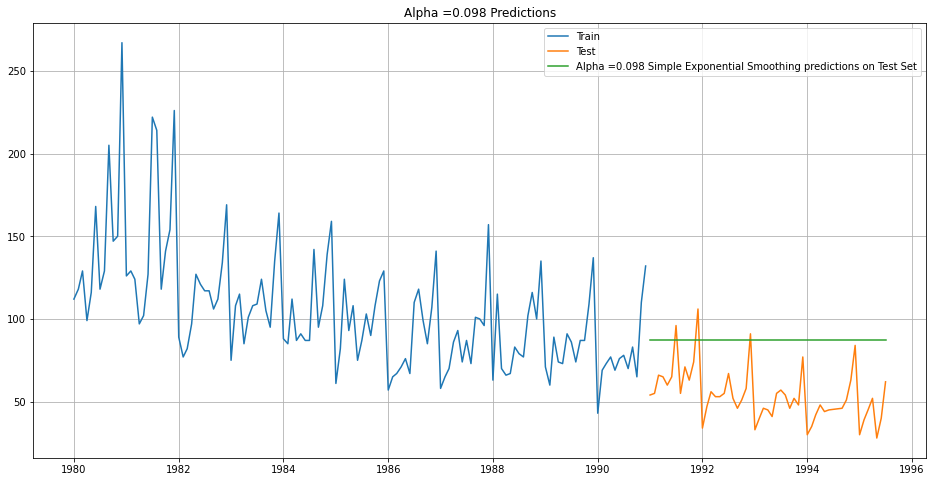

In [244]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.098 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.098 Predictions');

Model Evaluation for  𝛼
α
  = 0.098 : Simple Exponential Smoothing

In [245]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.098 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))




For Alpha =0.098 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.796


In [246]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.098,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,15.27
NaiveModel,79.72
SimpleAverageModel,53.46
2pointTrailingMovingAverage,11.53
3pointTrailingMovingAverage,14.13
4pointTrailingMovingAverage,14.45
6pointTrailingMovingAverage,14.57
9pointTrailingMovingAverage,14.73
"Alpha=0.098,SimpleExponentialSmoothing",36.80


Setting different alpha values
Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.
We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [247]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

,Alpha Values,Train RMSE,Test RMSE


In [248]:


for i in np.arange(0.05,1,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [249]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).head(7)

,Alpha Values,Train RMSE,Test RMSE
2,0.07,32.05,36.44
3,0.08,31.94,36.46
1,0.06,32.21,36.58
4,0.09,31.86,36.60
5,0.10,31.82,36.83
0,0.05,32.45,37.01
6,0.11,31.79,37.12


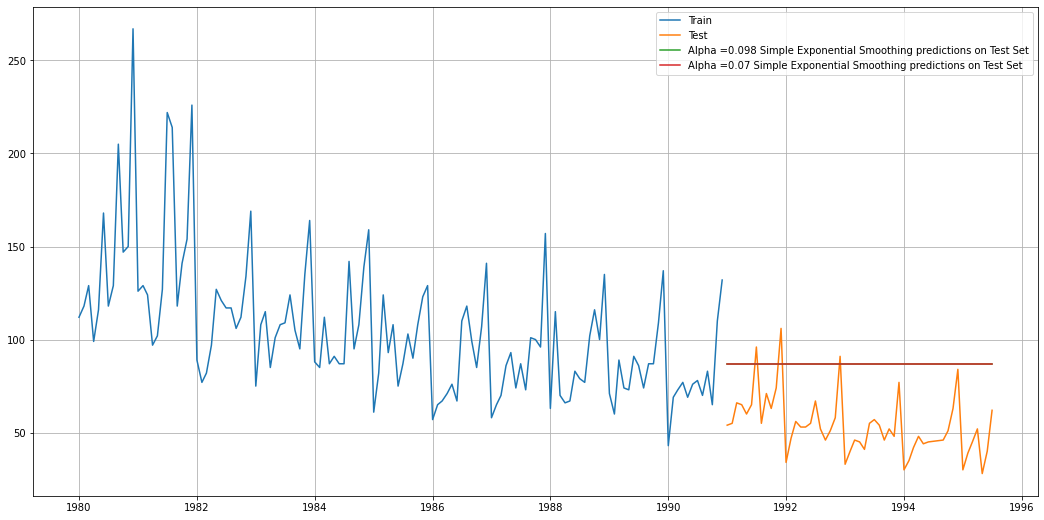

In [250]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.098 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.07], label='Alpha =0.07 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [251]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.07,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE
RegressionOnTime,15.27
NaiveModel,79.72
SimpleAverageModel,53.46
2pointTrailingMovingAverage,11.53
3pointTrailingMovingAverage,14.13
4pointTrailingMovingAverage,14.45
6pointTrailingMovingAverage,14.57
9pointTrailingMovingAverage,14.73
"Alpha=0.098,SimpleExponentialSmoothing",36.80
"Alpha=0.07,SimpleExponentialSmoothing",36.44


## Method 6: Double Exponential Smoothing (Holt's Model)

Two parameters  𝛼
α
  and  𝛽
β
  are estimated in this model. Level and Trend are accounted for in this model.

In [252]:
DES_train = train.copy()
DES_test = test.copy()

In [253]:
model_DES = Holt(DES_train['Rose'])

In [254]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [255]:
for i in np.arange(0.04,1,0.01):
    for j in np.arange(0.04,1,0.01):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [256]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
43,0.04,0.47,37.39,14.56
0,0.04,0.04,61.52,14.90
42,0.04,0.46,37.49,14.91
126,0.05,0.34,36.31,15.94
125,0.05,0.33,36.39,16.00


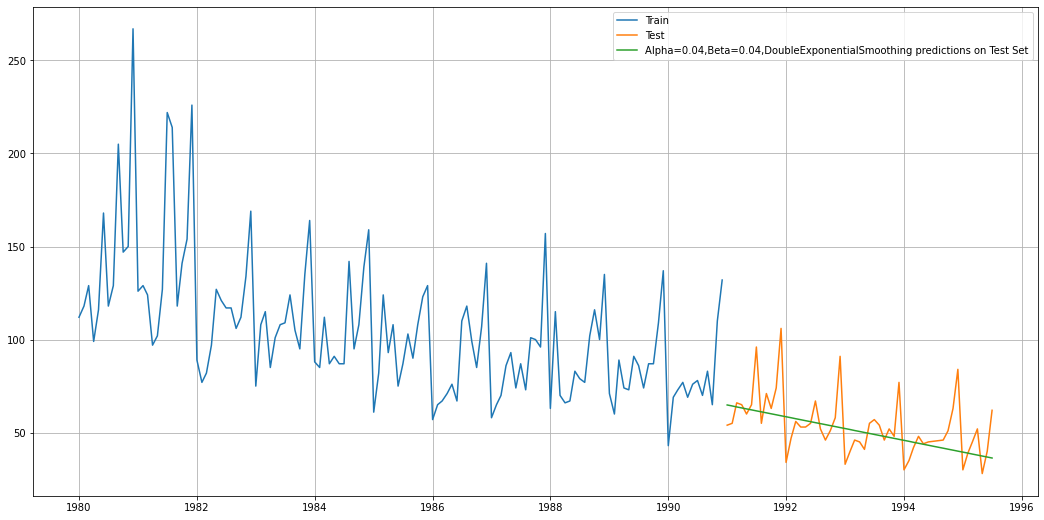

In [257]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict',0.04,0.04],label='Alpha=0.04,Beta=0.04,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [258]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.04,Beta=0.04,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE
RegressionOnTime,15.27
NaiveModel,79.72
SimpleAverageModel,53.46
2pointTrailingMovingAverage,11.53
3pointTrailingMovingAverage,14.13
4pointTrailingMovingAverage,14.45
6pointTrailingMovingAverage,14.57
9pointTrailingMovingAverage,14.73
"Alpha=0.098,SimpleExponentialSmoothing",36.80
"Alpha=0.07,SimpleExponentialSmoothing",36.44


## Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

Three parameters 𝛼 α , 𝛽 β and 𝛾 γ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [259]:
TES_train = train.copy()
TES_test = test.copy()

In [260]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative')

In [261]:
model_TES_autofit = model_TES.fit()

The above fit of the model is by the best parameters that Python thinks for the model. It uses a brute force method to choose the parameters

In [262]:
model_TES_autofit.params

{'smoothing_level': 0.10053559166352141,
 'smoothing_trend': 2.9667113597565187e-06,
 'smoothing_seasonal': 3.752823638129799e-07,
 'damping_trend': nan,
 'initial_level': 49.81115356815166,
 'initial_trend': -0.19155645429914447,
 'initial_seasons': array([2.19563917, 2.47993924, 2.71080105, 2.37691247, 2.66805867,
        2.8714592 , 3.16165653, 3.38100476, 3.16286393, 3.11258111,
        3.61951388, 4.95479995]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [263]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Rose,auto_predict
YearMonth,,
1991-01-01,54.00,54.08
1991-02-01,55.00,60.61
1991-03-01,66.00,65.73
1991-04-01,65.00,57.18
1991-05-01,60.00,63.67


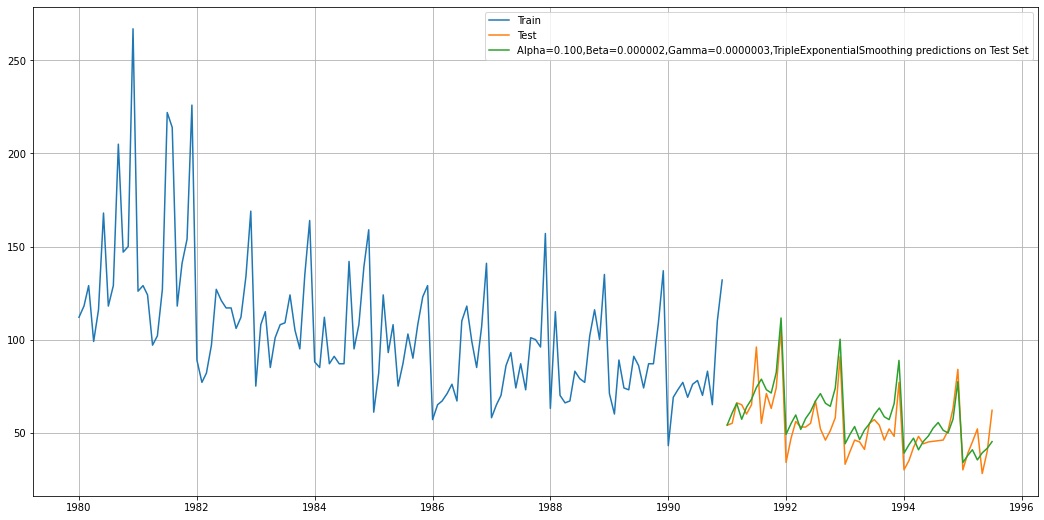

In [264]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.100,Beta=0.000002,Gamma=0.0000003,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [265]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.100,Beta=0.000002,Gamma=0.0000003, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.100,Beta=0.000002,Gamma=0.0000003, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 9.773


In [266]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.100,Beta=0.000002,Gamma=0.0000003,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE
RegressionOnTime,15.27
NaiveModel,79.72
SimpleAverageModel,53.46
2pointTrailingMovingAverage,11.53
3pointTrailingMovingAverage,14.13
4pointTrailingMovingAverage,14.45
6pointTrailingMovingAverage,14.57
9pointTrailingMovingAverage,14.73
"Alpha=0.098,SimpleExponentialSmoothing",36.80
"Alpha=0.07,SimpleExponentialSmoothing",36.44


In [267]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [268]:
for i in np.arange(0.1,1,0.1):
    for j in np.arange(0,1,0.1):
        for k in np.arange(0,1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [269]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head(10)

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
22,0.10,0.20,0.20,24.37,9.64
23,0.10,0.20,0.30,23.97,9.94
21,0.10,0.20,0.10,25.53,9.94
153,0.20,0.50,0.30,27.63,10.03
162,0.20,0.60,0.20,28.29,10.03
24,0.10,0.20,0.40,23.92,10.39
225,0.30,0.20,0.50,26.81,10.40
243,0.30,0.40,0.30,28.11,10.95
25,0.10,0.20,0.50,24.10,10.97
234,0.30,0.30,0.40,27.40,11.20


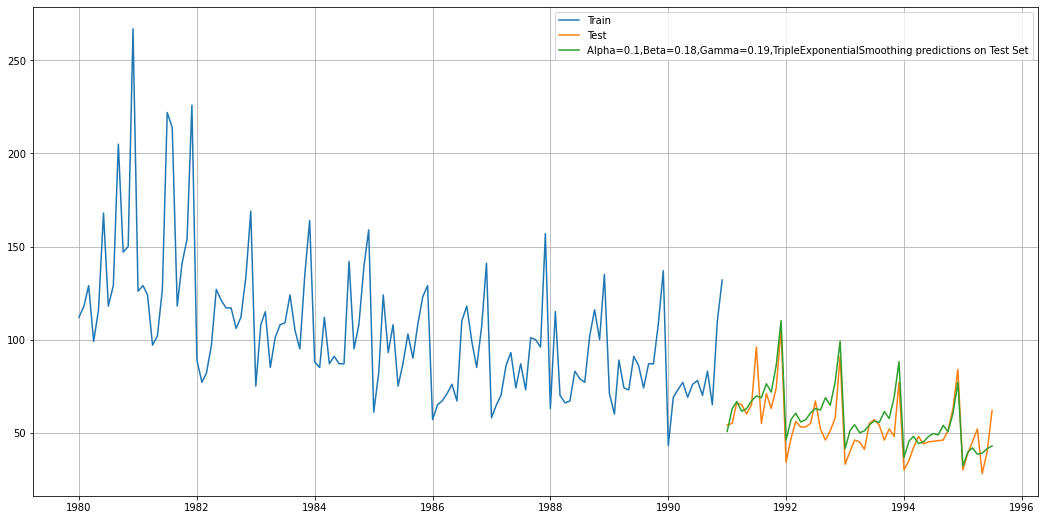

In [294]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict',0.1,0.20,0.20],label='Alpha=0.1,Beta=0.18,Gamma=0.19,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [272]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=.10,Beta=0.18,Gamma=0.19,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE
RegressionOnTime,15.27
NaiveModel,79.72
SimpleAverageModel,53.46
2pointTrailingMovingAverage,11.53
3pointTrailingMovingAverage,14.13
4pointTrailingMovingAverage,14.45
6pointTrailingMovingAverage,14.57
9pointTrailingMovingAverage,14.73
"Alpha=0.098,SimpleExponentialSmoothing",36.80
"Alpha=0.07,SimpleExponentialSmoothing",36.44


In [273]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE
"Alpha=.10,Beta=0.18,Gamma=0.19,TripleExponentialSmoothing",9.64
"Alpha=0.100,Beta=0.000002,Gamma=0.0000003,TripleExponentialSmoothing",9.77
2pointTrailingMovingAverage,11.53
3pointTrailingMovingAverage,14.13
4pointTrailingMovingAverage,14.45
"Alpha=0.04,Beta=0.04,DoubleExponentialSmoothing",14.56
6pointTrailingMovingAverage,14.57
9pointTrailingMovingAverage,14.73
RegressionOnTime,15.27
"Alpha=0.07,SimpleExponentialSmoothing",36.44


# We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters  𝛼
α
  = .10,  𝛽
β
  = 0.18 and  𝛾
γ
  = 0.19¶

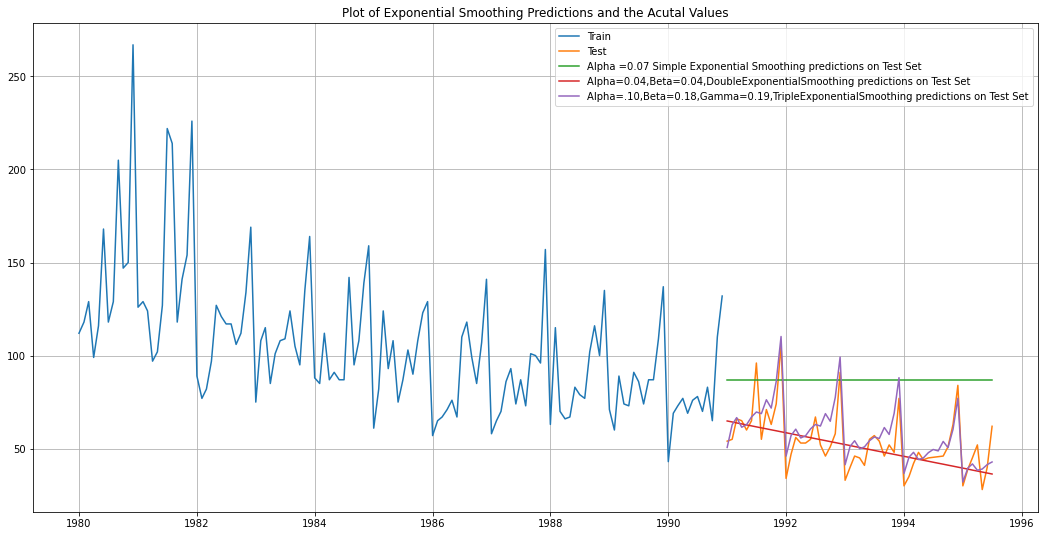

In [296]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(SES_test['predict', 0.07], label='Alpha =0.07 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.04, 0.04], label='Alpha=0.04,Beta=0.04,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.10, 0.20, 0.20], label='Alpha=.10,Beta=0.18,Gamma=0.19,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

In this particular we have built several models and went through a model building exercise. This particular exercise has given us an idea as to which particular model gives us the least error on our test set for this data. But in Time Series Forecasting, we need to be very vigil about the fact that after we have done this exercise we need to build the model on the whole data. Remember, the training data that we have used to build the model stops much before the data ends. In order to forecast using any of the models built, we need to build the models again (this time on the complete data) with the same parameters. For this particular mentored learning session, we will go ahead and build only the top 2 models which gave us the best accuracy (least RMSE). The two models to be built on the whole data are the following:

**Alpha=0.1,Beta=0.18,Gamma=0.19,TripleExponentialSmoothing Alpha=0.1,Beta=0.000002,Gamma=0.0000003,TripleExponentialSmoothing**

In [297]:
fullmodel1 = ExponentialSmoothing(df_1,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.1,
                                                                 smoothing_trend=0.18,
                                                                 smoothing_seasonal=0.19)
RMSE_fullmodel1 = metrics.mean_squared_error(df_1['Rose'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 17.33376215221408


In [298]:
def mape(actual, predicted):
    actual,predicted = np.array(actual),np.array(predicted)
    return np.mean(np.abs((actual-predicted)/actual))*100

mape = mape(df_1['Rose'],fullmodel1.fittedvalues)
print('MAPE:', mape)

MAPE: 13.554101130291047


In [299]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=len(test))

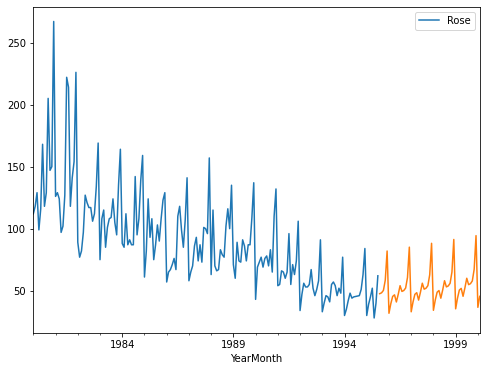

In [300]:
df_1.plot()
prediction_1.plot();

One assumption that we have made over here while calculating the confidence bands is that the standard deviation of the forecast distribution is almost equal to the residual standard deviation.

In [301]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

,lower_CI,prediction,upper_ci
1995-08-01,13.53,47.59,81.64
1995-09-01,14.23,48.29,82.34
1995-10-01,16.16,50.21,84.26
1995-11-01,24.36,58.41,92.46
1995-12-01,47.93,81.99,116.04


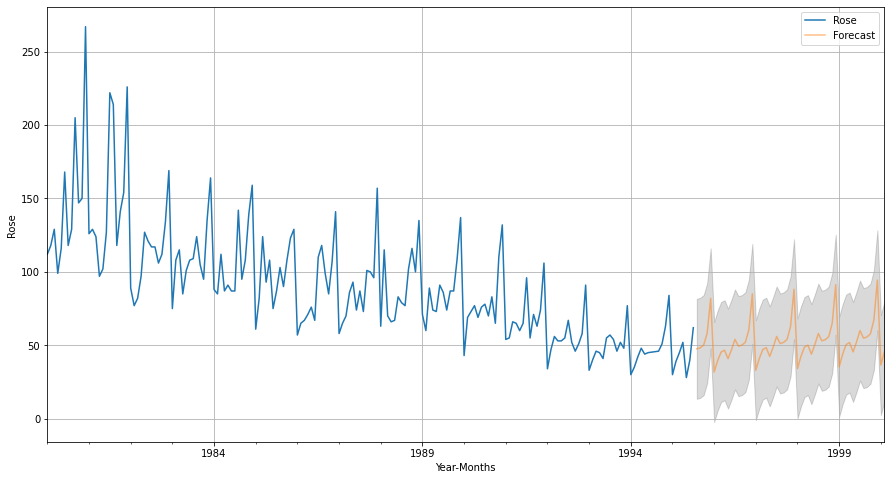

In [302]:
# plot the forecast along with the confidence band

axis = df_1.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.grid()
plt.show()

Let us now build the second model using the same parameters on the full data and check the confidence bands when we forecast into the future for the length of the test set.

In [303]:
fullmodel2 = ExponentialSmoothing(df_1,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.1,
                                                                 smoothing_trend=0.000002,
                                                                 smoothing_seasonal=0.0000003)

In [304]:
RMSE_fullmodel2 = metrics.mean_squared_error(df_1['Rose'],fullmodel2.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel2)

RMSE: 16.096921646285427


In [305]:
def mape(actual, predicted):
    actual,predicted = np.array(actual),np.array(predicted)
    return np.mean(np.abs((actual-predicted)/actual))*100

mape = mape(df_1['Rose'],fullmodel2.fittedvalues)
print('MAPE:', mape)

MAPE: 12.464084223486102


In [306]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_2 = fullmodel2.forecast(steps=len(test))

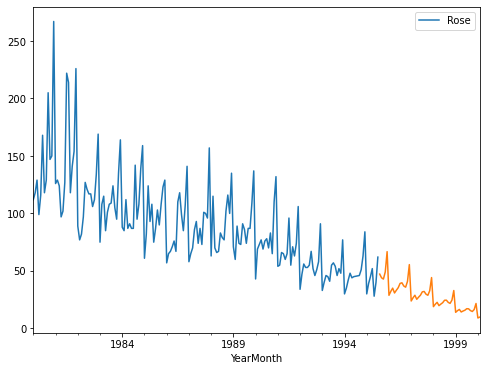

In [307]:
df_1.plot()
prediction_2.plot();

In [308]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_2_df = pd.DataFrame({'lower_CI':prediction_2 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_2,
                          'upper_ci': prediction_2 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_2_df.head()

,lower_CI,prediction,upper_ci
1995-08-01,13.16,47.21,81.26
1995-09-01,9.96,44.01,78.06
1995-10-01,8.84,42.89,76.94
1995-11-01,15.06,49.11,83.16
1995-12-01,32.70,66.75,100.80


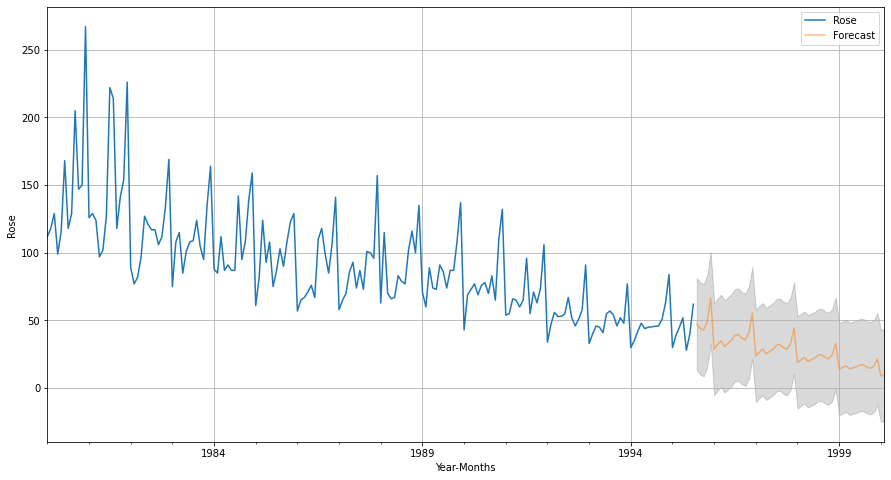

In [309]:
# plot the forecast along with the confidence band

axis = df_1.plot(label='Actual', figsize=(15,8))
pred_2_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_2_df.index, pred_2_df['lower_CI'], pred_2_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.grid()
plt.show()

In [310]:
df_1

,Rose
YearMonth,
1980-01-01,112.00
1980-02-01,118.00
1980-03-01,129.00
1980-04-01,99.00
1980-05-01,116.00
...,...
1995-03-01,45.00
1995-04-01,52.00
1995-05-01,28.00


## Check for stationarity

### Dicky Fuller Test

#### Null Hypothesis H0- Series is not Stationary
#### Alternative Hypothesis H1- Series is Stationary

In [311]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False) ## You plot will stay open - will be seen always
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

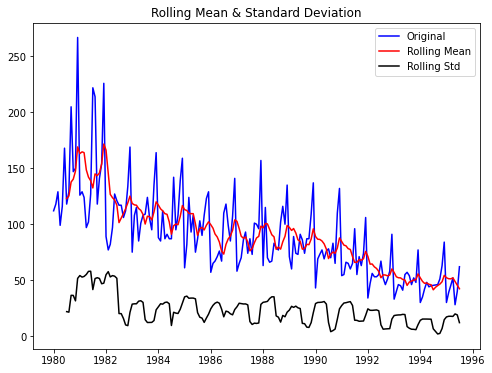

Results of Dickey-Fuller Test:
Test Statistic                 -1.88
p-value                         0.34
#Lags Used                     13.00
Number of Observations Used   173.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64 



In [312]:
test_stationarity(df_1['Rose'])

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

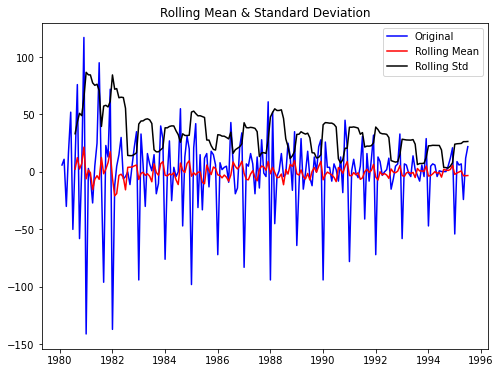

Results of Dickey-Fuller Test:
Test Statistic                 -8.04
p-value                         0.00
#Lags Used                     12.00
Number of Observations Used   173.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64 



In [313]:
test_stationarity(df_1['Rose'].diff().dropna())

We see that at  𝛼
α
  = 0.05 the Time Series is indeed stationary.

In [314]:
df_1

,Rose
YearMonth,
1980-01-01,112.00
1980-02-01,118.00
1980-03-01,129.00
1980-04-01,99.00
1980-05-01,116.00
...,...
1995-03-01,45.00
1995-04-01,52.00
1995-05-01,28.00


### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [315]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

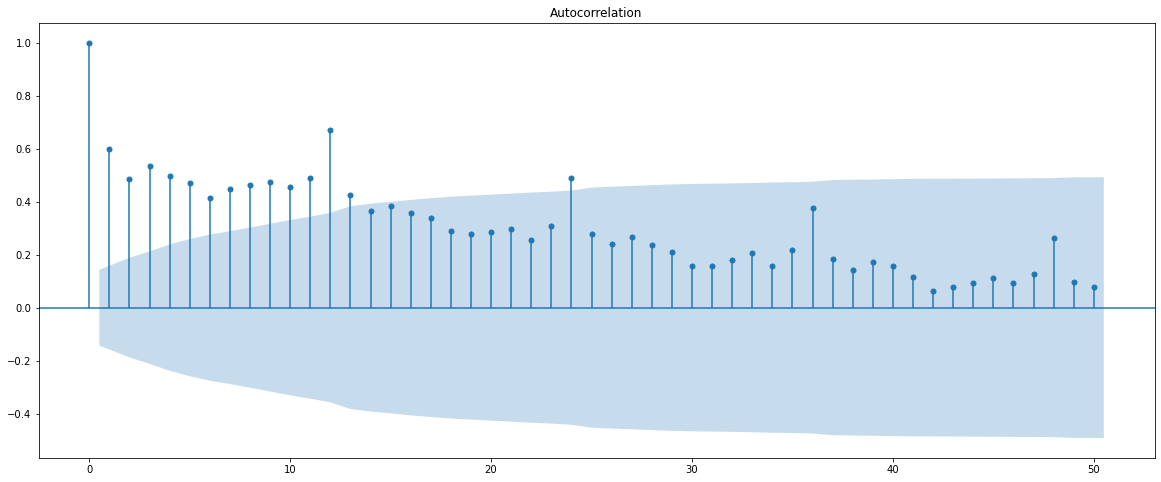

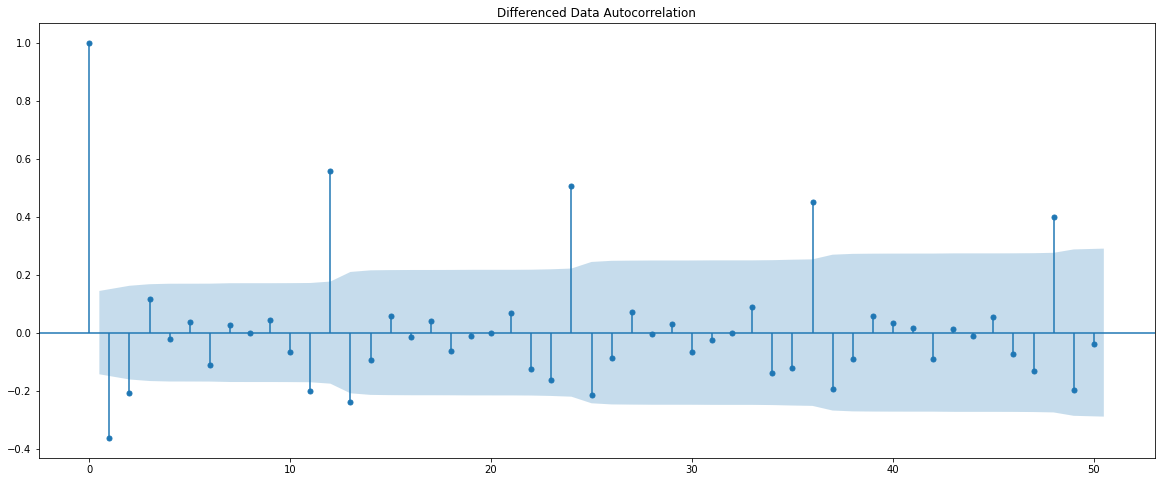

In [316]:
plot_acf(df_1['Rose'],lags=50)
plot_acf(df_1['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

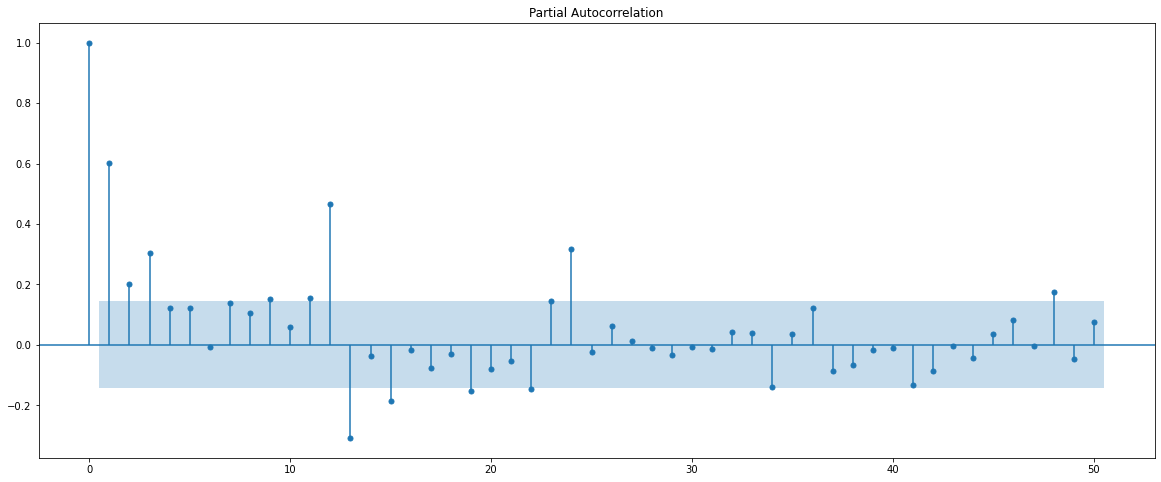

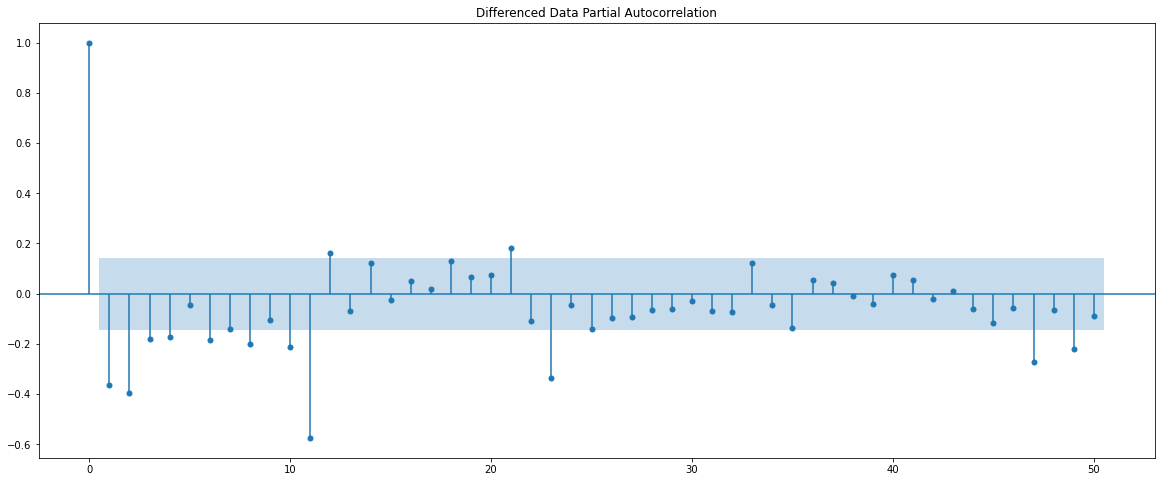

In [317]:
plot_pacf(df_1['Rose'],lags=50)
plot_pacf(df_1['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

## Split the data into train and test and plot the training and test data.

Training Data is till Dec 1990 . Test Data is from the beginning Jan 1991

In [318]:
train=df_1[df_1.index.year < 1991]
test=df_1[df_1.index.year >= 1991]

In [319]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [320]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
YearMonth,
1980-01-01,112.00
1980-02-01,118.00
1980-03-01,129.00
1980-04-01,99.00
1980-05-01,116.00


Last few rows of Training Data


,Rose
YearMonth,
1990-08-01,70.00
1990-09-01,83.00
1990-10-01,65.00
1990-11-01,110.00
1990-12-01,132.00


First few rows of Test Data


,Rose
YearMonth,
1991-01-01,54.00
1991-02-01,55.00
1991-03-01,66.00
1991-04-01,65.00
1991-05-01,60.00


Last few rows of Test Data


,Rose
YearMonth,
1995-03-01,45.00
1995-04-01,52.00
1995-05-01,28.00
1995-06-01,40.00
1995-07-01,62.00


In [321]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


#### Check for stationarity of the Training Data Time Series.¶

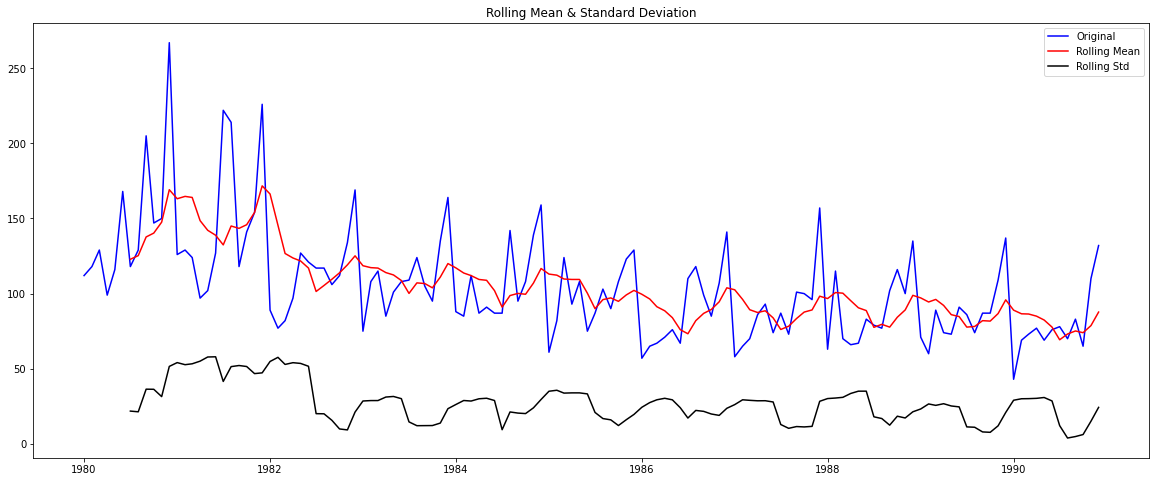

Results of Dickey-Fuller Test:
Test Statistic                 -2.16
p-value                         0.22
#Lags Used                     13.00
Number of Observations Used   118.00
Critical Value (1%)            -3.49
Critical Value (5%)            -2.89
Critical Value (10%)           -2.58
dtype: float64 



In [322]:
test_stationarity(train['Rose'])

We see that the series is not stationary at  𝛼
α
  = 0.05.

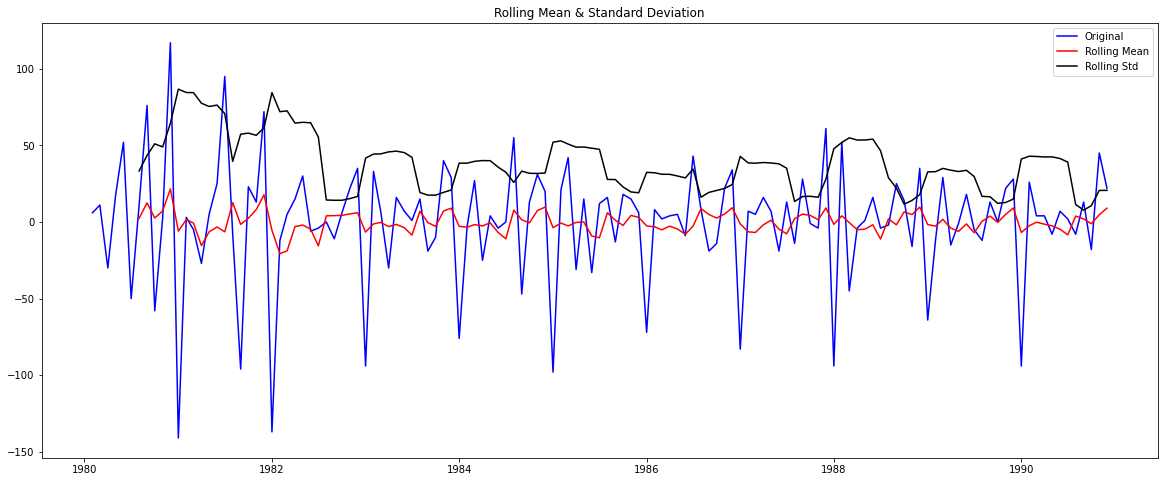

Results of Dickey-Fuller Test:
Test Statistic                 -6.59
p-value                         0.00
#Lags Used                     12.00
Number of Observations Used   118.00
Critical Value (1%)            -3.49
Critical Value (5%)            -2.89
Critical Value (10%)           -2.58
dtype: float64 



In [323]:
test_stationarity(train['Rose'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at  𝛼
α
  = 0.05.

Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms.

In [324]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


### Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

## Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

In [325]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [326]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [327]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit(disp=0)
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.726183046448
ARIMA(0, 1, 2) - AIC:1276.8353727957747
ARIMA(1, 1, 0) - AIC:1319.3483105802602
ARIMA(1, 1, 1) - AIC:1277.775749775043
ARIMA(1, 1, 2) - AIC:1277.3592236734212
ARIMA(2, 1, 0) - AIC:1300.6092611743966
ARIMA(2, 1, 1) - AIC:1279.045689409315
ARIMA(2, 1, 2) - AIC:1279.2986939365064


In [328]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",1276.84
5,"(1, 1, 2)",1277.36
4,"(1, 1, 1)",1277.78
7,"(2, 1, 1)",1279.05
8,"(2, 1, 2)",1279.30
1,"(0, 1, 1)",1280.73
6,"(2, 1, 0)",1300.61
3,"(1, 1, 0)",1319.35
0,"(0, 1, 0)",1335.15


In [329]:
# Apply the ARIMA Model
# Top box -  Gives the overall summary
# Middle box -  Gives the coefficients and tells if the varibales are significant
# Lower box(Roots) - If the model is stable and good for forecasting.Between Imaginary & Real you draw a circle and check
# if the values/roots are inside the circle
auto_ARIMA = ARIMA(train['Rose'], order=(0,1,2))

results_auto_ARIMA = auto_ARIMA.fit(disp=0)

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.167
Date:                Sun, 20 Mar 2022   AIC                           1276.835
Time:                        01:03:02   BIC                           1288.336
Sample:                    02-01-1980   HQIC                          1281.509
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7601      0.101     -7.499      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.51

## Predict on the Test Set using this model and evaluate the model.

In [330]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [331]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

15.618059133184662


In [332]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(0,1,2)'])

resultsDf

,RMSE
"ARIMA(0,1,2)",15.62


In [333]:
# Apply the ARIMA Model
# Top box -  Gives the overall summary
# Middle box -  Gives the coefficients and tells if the varibales are significant
# Lower box(Roots) - If the model is stable and good for forecasting.Between Imaginary & Real you draw a circle and check
# if the values/roots are inside the circle
auto_ARIMA = ARIMA(train['Rose'], order=(1,1,2))

results_auto_ARIMA = auto_ARIMA.fit(disp=0)

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -633.680
Method:                       css-mle   S.D. of innovations             29.978
Date:                Sun, 20 Mar 2022   AIC                           1277.359
Time:                        01:03:02   BIC                           1291.735
Sample:                    02-01-1980   HQIC                          1283.201
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4921      0.079     -6.224      0.000      -0.647      -0.337
ar.L1.D.Rose    -0.4163      0.222     -1.874      0.061      -0.852       0.019
ma.L1.D.Rose    -0.3616      0.189     -1.91

In [334]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [335]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

15.284956965891281


In [336]:
tempresultsDf1 = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(1,1,2)'])
resultsDf = pd.concat([resultsDf,tempresultsDf1])
resultsDf

,RMSE
"ARIMA(0,1,2)",15.62
"ARIMA(1,1,2)",15.28


## Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

Let us look at the ACF and the PACF plots once more.

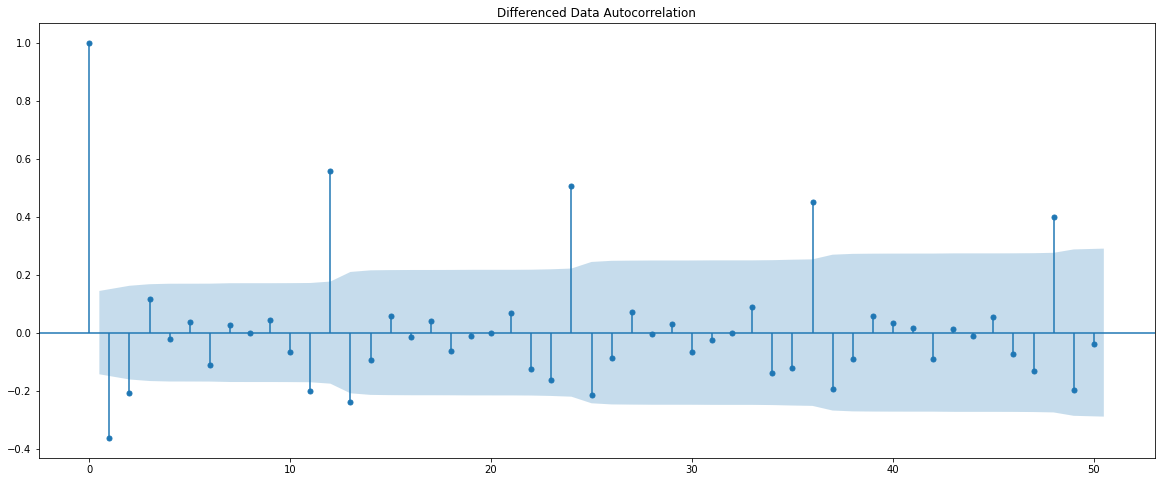

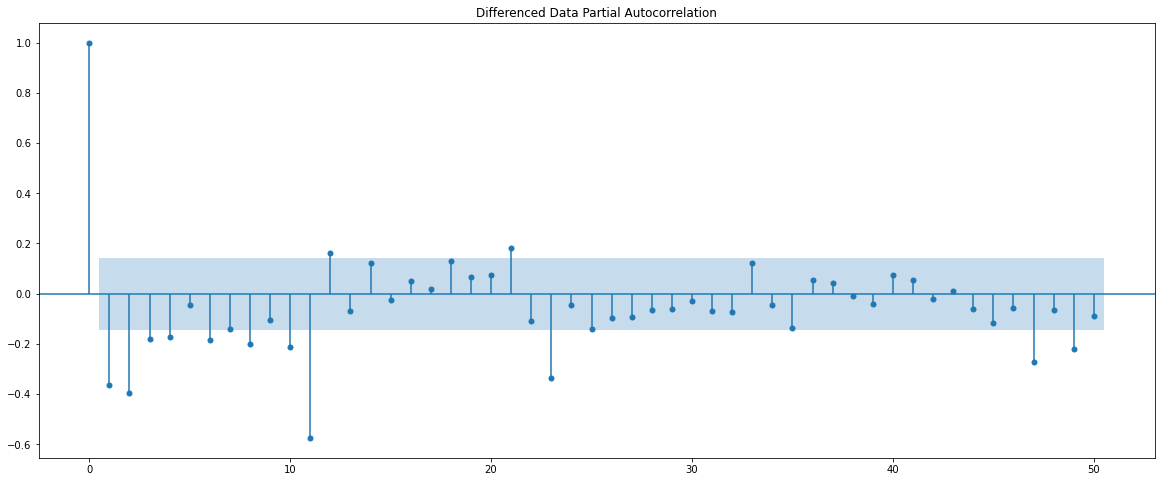

In [337]:
plot_acf(df_1['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_1['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.
The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.
By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 0.

In [338]:
manual_ARIMA = ARIMA(train['Rose'].astype('float64'), order=(4,1,2))

results_manual_ARIMA = manual_ARIMA.fit(disp=0)

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -633.876
Method:                       css-mle   S.D. of innovations             29.793
Date:                Sun, 20 Mar 2022   AIC                           1283.753
Time:                        01:03:04   BIC                           1306.754
Sample:                    02-01-1980   HQIC                          1293.099
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1905      0.576     -0.331      0.741      -1.319       0.938
ar.L1.D.Rose     1.1685      0.087     13.391      0.000       0.997       1.340
ar.L2.D.Rose    -0.3562      0.132     -2.69

Note: When we see that both the AR(p) and the MA(q) model are of order 0, we have to convert the input variable into a 'float64' type variable else Python might throw an error.

### Predict on the Test Set using this model and evaluate the model.

In [339]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [340]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

33.94980253793621


In [341]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(4,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(0,1,2)",15.62
"ARIMA(1,1,2)",15.28
"ARIMA(4,1,2)",33.95


We see that there is difference in the RMSE values for both the models, but remember that the second model is a much simpler model.

### Build an Automated version of an SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

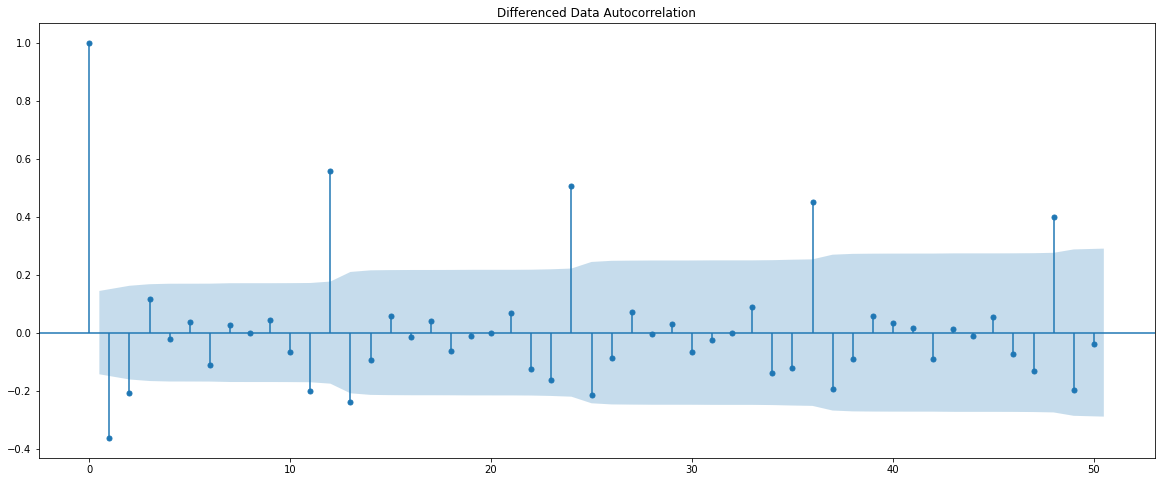

In [342]:
plot_acf(df_1['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 6 as well as 12. We will run our auto SARIMA models by setting seasonality both as 6 and 12.

Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [343]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [344]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [345]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,  ## by force you can make it TS stationary
                                            enforce_invertibility=False) ## Alpha and Beta should be unique
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000,disp=0)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1264.4996261113865
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1144.7077471827401
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1274.7897737087985
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1241.7870945149125
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1146.309326672216
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.4533629515201
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1117.0224426339441
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1201.3832548029554
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1097.1908217752778
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1222.4354735745055
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1160.4386253746572
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1084.856412330377
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1095.7490379982632
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1097.6455188249363
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1053.0044082625043
SARIMA(0, 1, 2)x(0, 0, 0, 6) -

In [346]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
53,"(1, 1, 2)","(2, 0, 2, 6)",1041.66
26,"(0, 1, 2)","(2, 0, 2, 6)",1043.60
80,"(2, 1, 2)","(2, 0, 2, 6)",1045.22
71,"(2, 1, 1)","(2, 0, 2, 6)",1051.67
44,"(1, 1, 1)","(2, 0, 2, 6)",1052.78


In [347]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000,disp=0)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -512.828
Date:                           Sun, 20 Mar 2022   AIC                           1041.656
Time:                                   01:03:29   BIC                           1063.685
Sample:                                        0   HQIC                          1050.598
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5940      0.152     -3.919      0.000      -0.891      -0.297
ma.L1         -0.1953    611.849     -0.000

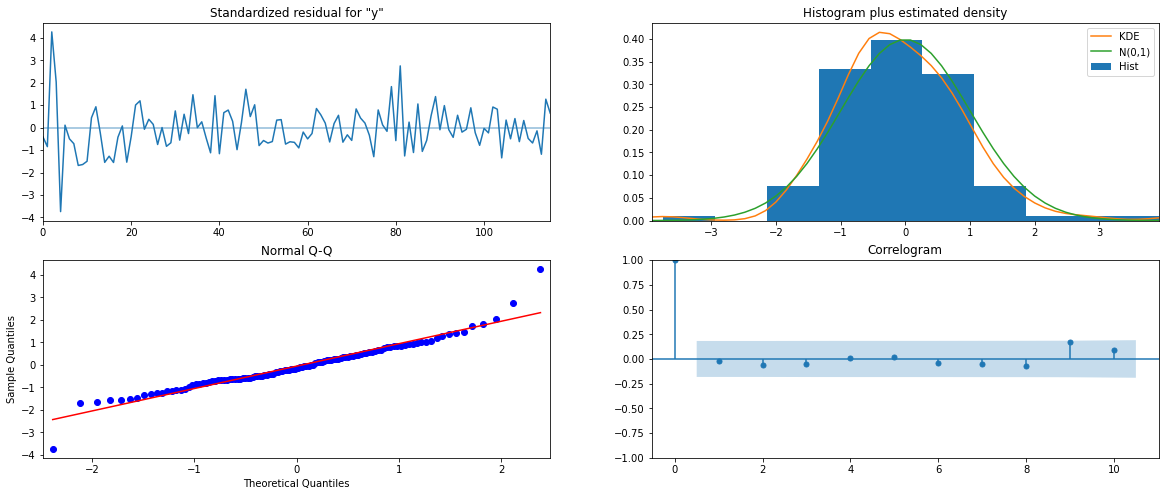

In [348]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots.

### Predict on the Test Set using this model and evaluate the model.

In [349]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [350]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.84,18.85,25.90,99.79
1,67.63,19.30,29.80,105.46
2,74.75,19.41,36.70,112.80
3,71.33,19.48,33.15,109.50
4,76.02,19.48,37.83,114.21


In [351]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

26.137058582692337


In [352]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(2,0,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(0,1,2)",15.62
"ARIMA(1,1,2)",15.28
"ARIMA(4,1,2)",33.95
"SARIMA(1,1,2)(2,0,2,6)",26.14


We see that we dont have a drop in the RMSE value by including the seasonal parameters as well.

#### Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [353]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [354]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [355]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000,disp=0)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207175
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380889
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386002
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635750373
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697546
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945712
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918334
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383817
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324918292
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330945698
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483311407
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866536103
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461675
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988257718638
SARIMA(0, 1, 2)x(0, 0

In [356]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",887.94
53,"(1, 1, 2)","(2, 0, 2, 12)",889.90
80,"(2, 1, 2)","(2, 0, 2, 12)",890.67
69,"(2, 1, 1)","(2, 0, 0, 12)",896.52
78,"(2, 1, 2)","(2, 0, 0, 12)",897.35


In [357]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000,disp=0)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Sun, 20 Mar 2022   AIC                            887.938
Time:                                    01:04:20   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.960     -0.004      0.996    -373.157     371.472
ma.L2         -0.1573     29.844   

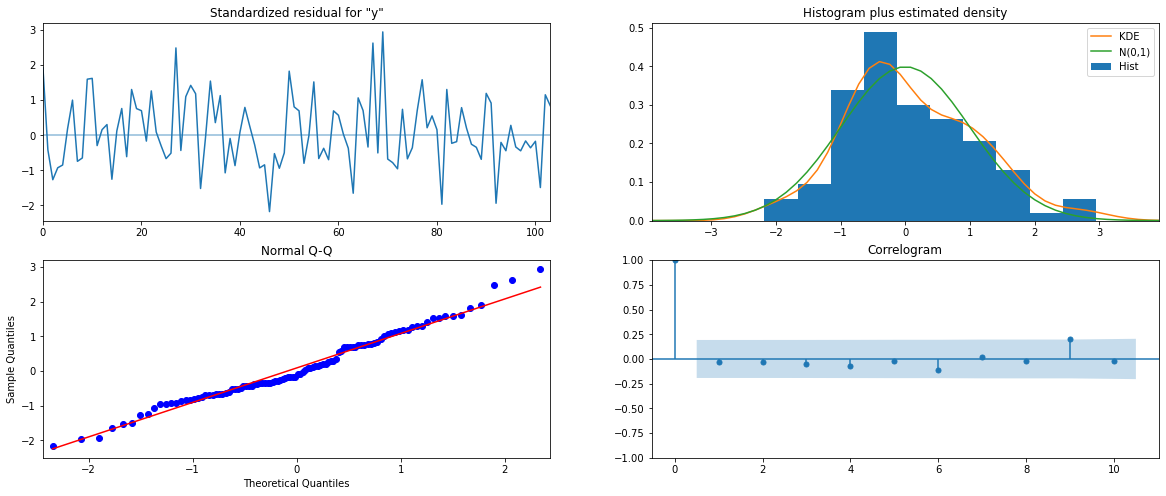

In [358]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

Similar to the last iteration of the model where the seasonality parameter was taken as 6, here also we see that the model diagnostics plot does not indicate any remaining information that we can get.

## Predict on the Test Set using this model and evaluate the model.

In [359]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [360]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.87,15.93,31.65,94.09
1,70.54,16.15,38.89,102.19
2,77.36,16.15,45.71,109.01
3,76.21,16.15,44.56,107.86
4,72.75,16.15,41.10,104.40


In [361]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

26.92836198302541


In [362]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(0,1,2)",15.62
"ARIMA(1,1,2)",15.28
"ARIMA(4,1,2)",33.95
"SARIMA(1,1,2)(2,0,2,6)",26.14
"SARIMA(0,1,2)(2,0,2,12)",26.93


We see that the RMSE value have not reduced further when the seasonality parameter was changed to 12.

## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6.

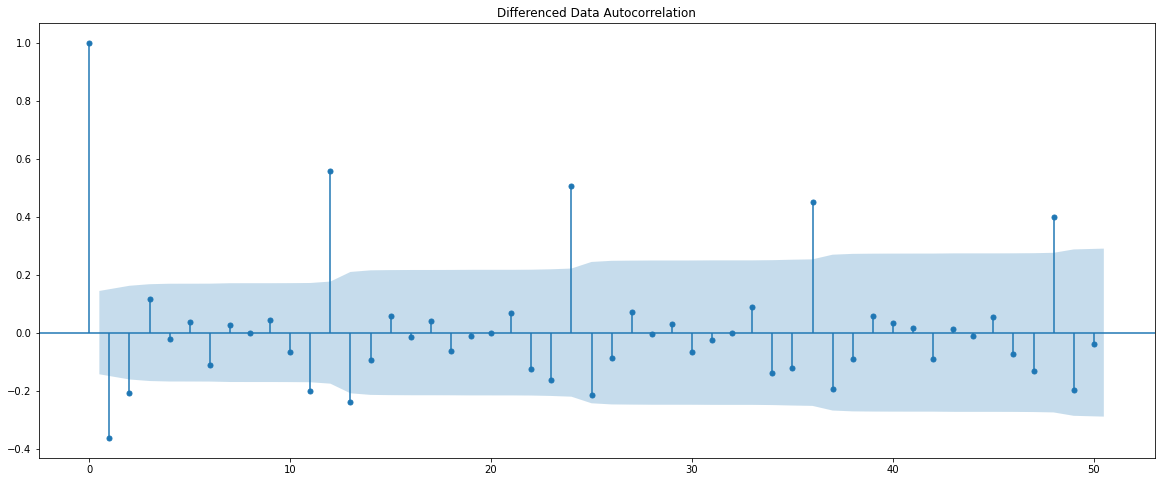

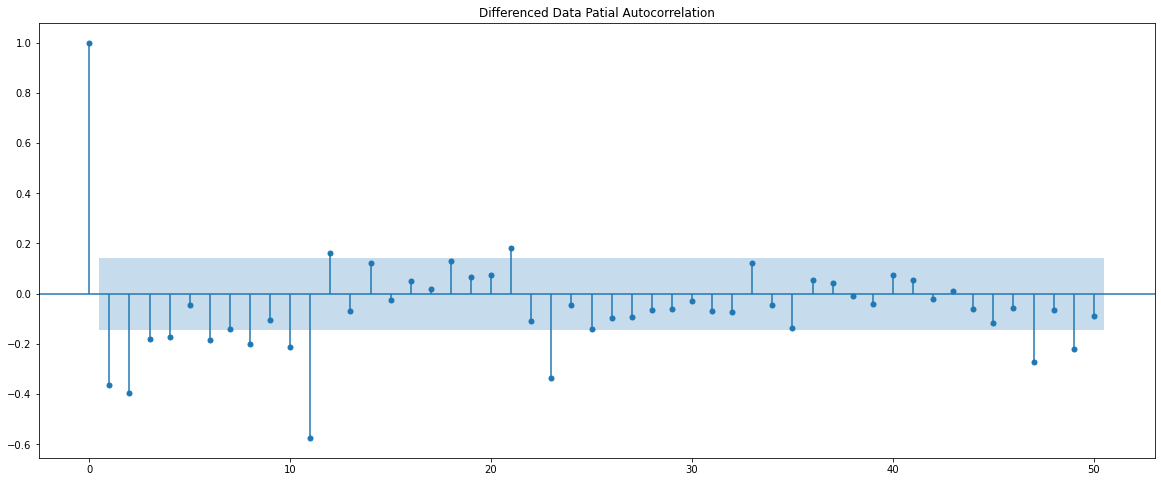

In [363]:
plot_acf(df_1['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_1['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

We see that our ACF plot at the seasonal interval (6) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

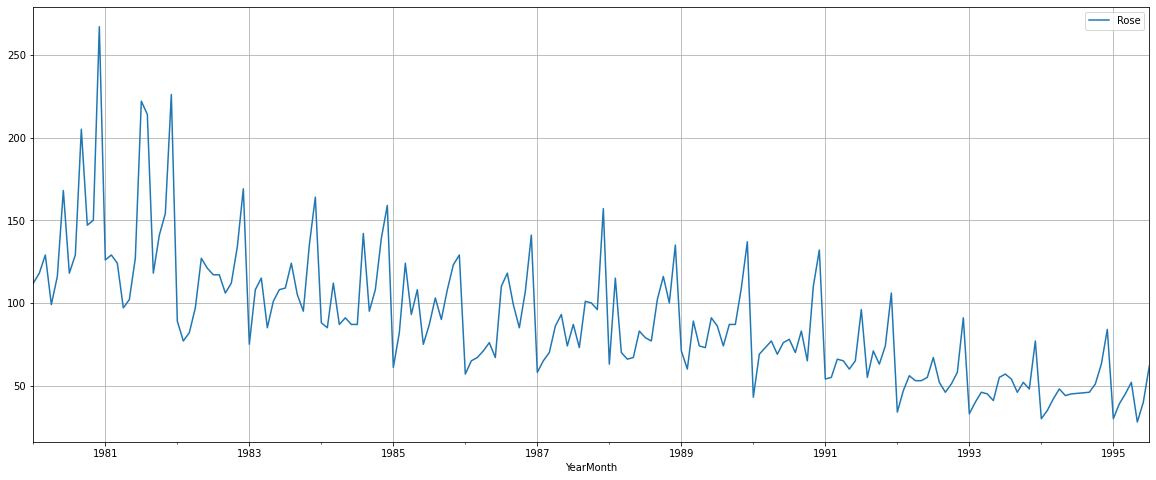

In [364]:
df_1.plot()
plt.grid();

We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series.

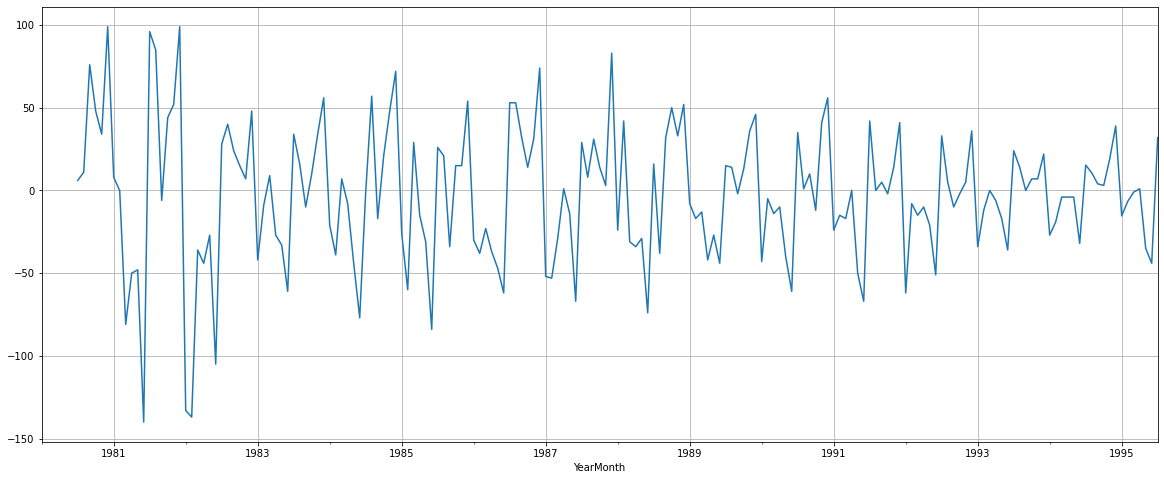

In [365]:
(df_1['Rose'].diff(6)).plot()
plt.grid();

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

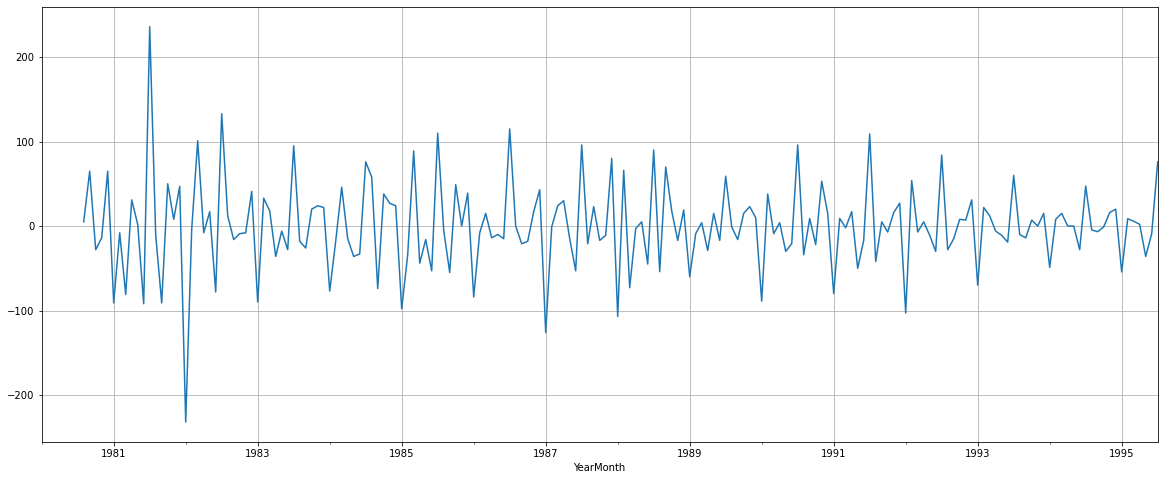

In [366]:
(df_1['Rose'].diff(6)).diff().plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.
Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

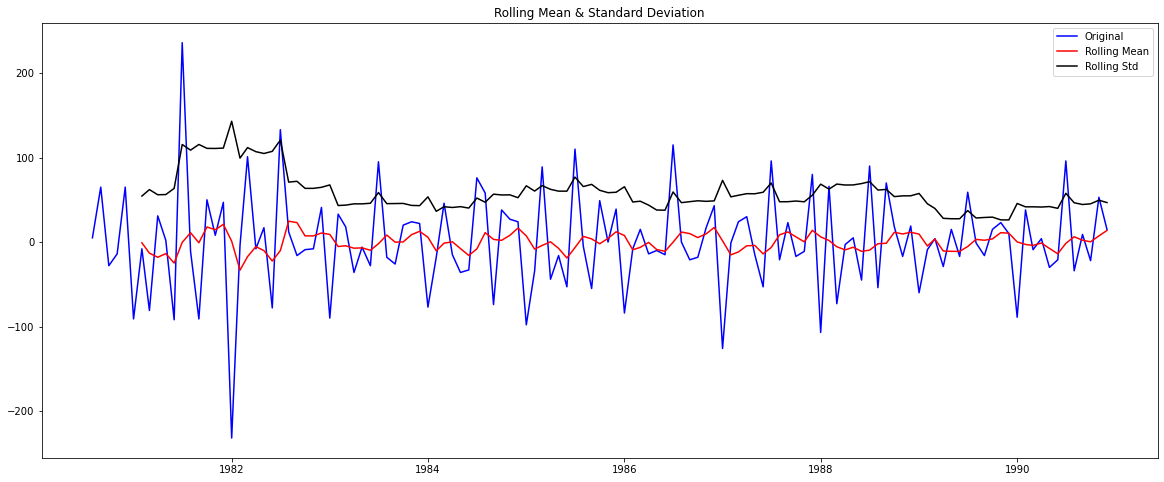

Results of Dickey-Fuller Test:
Test Statistic                 -6.88
p-value                         0.00
#Lags Used                     13.00
Number of Observations Used   111.00
Critical Value (1%)            -3.49
Critical Value (5%)            -2.89
Critical Value (10%)           -2.58
dtype: float64 



In [367]:
test_stationarity((train['Rose'].diff(6).dropna()).diff(1).dropna())

Checking the ACF and the PACF plots for the new modified Time Series.

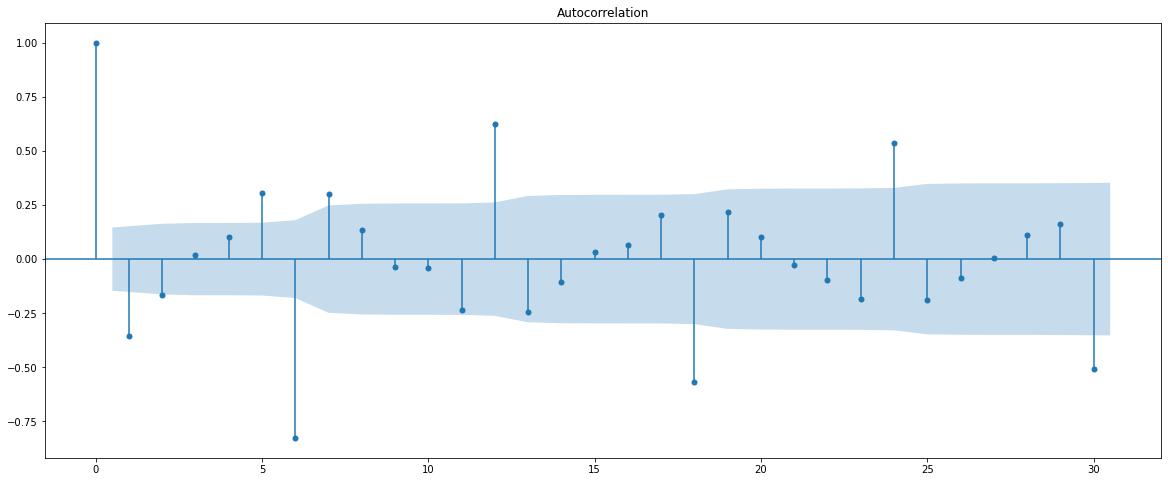

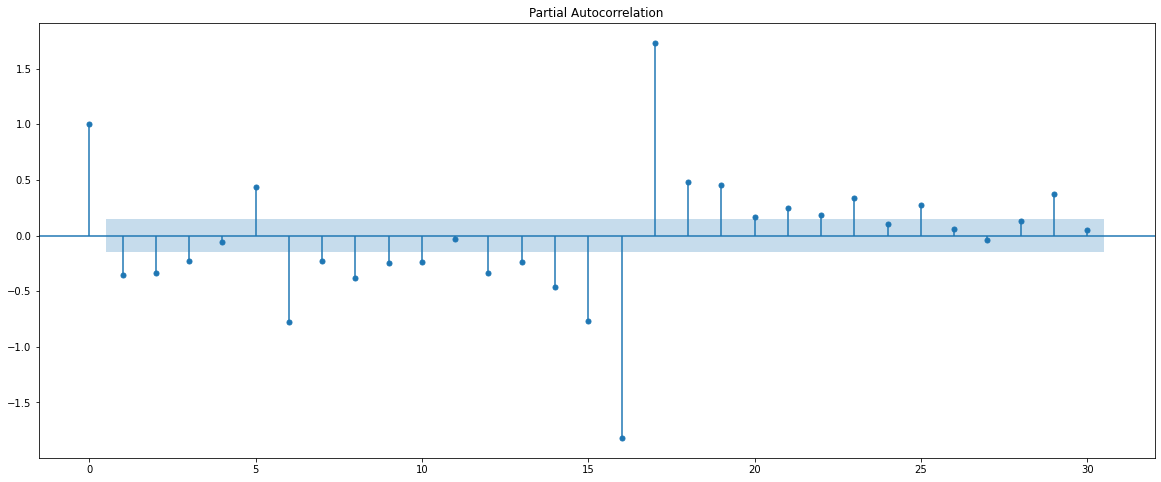

In [368]:
plot_acf((df_1['Rose'].diff(6).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df_1['Rose'].diff(6).dropna()).diff(1).dropna(),lags=30);

## Here, we have taken alpha=0.05.
We are going to take the seasonal period as 12. We will keep the p(1) and q(1) parameters same as the ARIMA model.
The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0.
The Moving-Average parameter in an SARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 0. Remember to check the ACF and the PACF plots only at multiples of 6 (since 6 is the seasonal period).
By looking at the plots we see that the ACF and the PACF do not directly cut-off to 0.
This is a common problem while building models by looking at the ACF and the PACF plots. But we are able to explain the model.
Please do play around with the data and try out different kinds of transformations and different levels of differencing on this data. We have not taken the logarithm of the series and then trying it out.

In [369]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0,1,2),
                                seasonal_order=(3, 1, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000,disp=0)
print(results_manual_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(3, 1, 2, 6)   Log Likelihood                -456.910
Date:                           Sun, 20 Mar 2022   AIC                            929.819
Time:                                   01:04:25   BIC                            951.202
Sample:                                        0   HQIC                           938.487
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7137      0.102     -6.975      0.000      -0.914      -0.513
ma.L2         -0.1883      0.095     -1.978

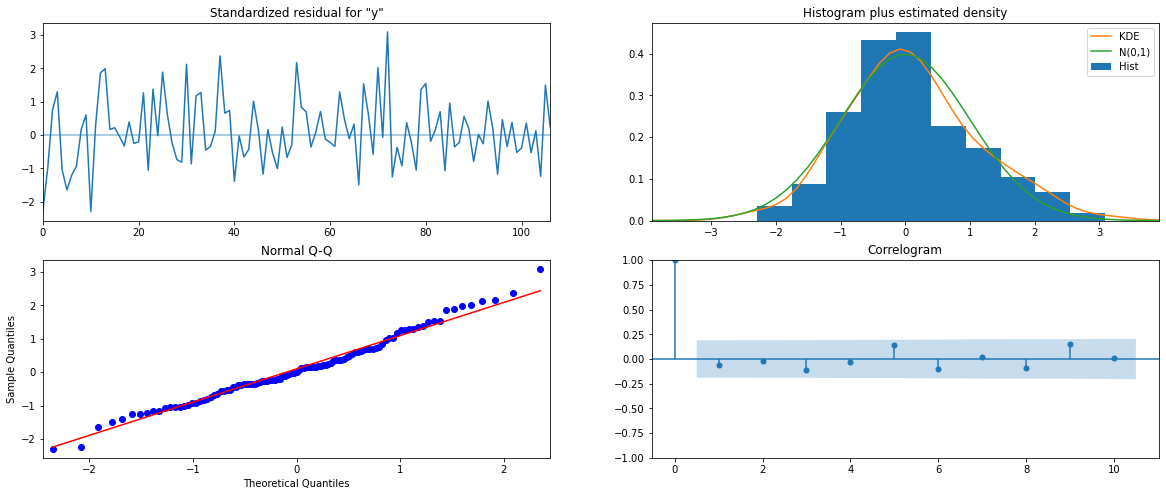

In [370]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

### Predict on the Test Set using this model and evaluate the model.

In [371]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [372]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,53.79,16.82,20.83,86.74
1,61.47,17.49,27.19,95.75
2,72.09,17.57,37.66,106.52
3,66.29,17.65,31.70,100.87
4,74.27,17.72,39.53,109.00


In [373]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

18.44047167838089


In [374]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(3,1,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(0,1,2)",15.62
"ARIMA(1,1,2)",15.28
"ARIMA(4,1,2)",33.95
"SARIMA(1,1,2)(2,0,2,6)",26.14
"SARIMA(0,1,2)(2,0,2,12)",26.93
"SARIMA(0,1,2)(3,1,2,6)",18.44


Now, we will take our best model and forecast 12 months into the future with appropriate confidence intervals to see how the predictions look. We have to build our model on the full data for this.

## Building the most optimum model on the Full Data.

In [375]:
# TES Model is the most optimum model that is built above using entire dataset and the predictions have been made